In [1]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import datetime as dt


path_kill = "../../../Data/DataRaw/set_kills.csv"
path_date = "../../../Data/set_addressDate.csv"
path_patchnote = "../../../Data/DataRework/set_patchNoteRework.csv"
path_ban = "../../../Data/DataRework/set_bansRework.csv"
path_champions = "../../../Data/DataRaw/set_infoChamp.csv"
path_infomatch = "../../../Data/DataRaw/set_matchInfo.csv"
path_classKills = "../../../Data/DataRework/set_killsClassChamp.csv"
path_date = "../../../Data/DataRework/set_addressDate.csv"

df_kills = pd.read_csv(path_kill)
df_patchNotes = pd.read_csv(path_patchnote)
df_bans = pd.read_csv(path_ban)
df_champ = pd.read_csv(path_champions)
df_match = pd.read_csv(path_infomatch)
df_kills_champClass = pd.read_csv(path_classKills)
df_date = pd.read_csv(path_date)

df_kills.Date = pd.to_datetime(df_kills.Date)
df_bans.Date = pd.to_datetime(df_bans.Date)
df_patchNotes.Date = pd.to_datetime(df_patchNotes.Date,dayfirst=True)
df_champ.ReleaseDate  = pd.to_datetime(df_champ.ReleaseDate)
df_date.Date = pd.to_datetime(df_date.Date)

df_kills = df_kills.drop(columns="Unnamed: 0")
df_patchNotes = df_patchNotes.drop(columns="Unnamed: 0")

df_patchNotes = df_patchNotes.sort_values(by="Date")
df_patchNotes = df_patchNotes.drop(df_patchNotes[df_patchNotes.Date < df_bans.Date.min()].index)
df_patchNotes = df_patchNotes.drop(df_patchNotes[df_patchNotes.Date > df_bans.Date.max()].index)
df_patchNotes = df_patchNotes.reset_index()
df_patchNotes = df_patchNotes.drop(columns="index")

##Lower the case of string for futher problem
df_patchNotes["NvxPersonnage"] = df_patchNotes["NvxPersonnage"].str.lower()
df_patchNotes["ChangementMajeurPersonnage"] = df_patchNotes["ChangementMajeurPersonnage"].str.lower()
df_patchNotes["AjustementMineurPerso"] = df_patchNotes["AjustementMineurPerso"].str.lower()
df_bans.Champions = df_bans.Champions.str.lower()
df_champ.Champions = df_champ.Champions.str.lower()


In [2]:
df_bans.head()

,Champions,ban_pos,TeamBan,Date
0,rumble,ban_1,blueBans,2015-01-24
1,kassadin,ban_1,blueBans,2015-01-24
2,jarvaniv,ban_1,blueBans,2015-01-25
3,annie,ban_1,blueBans,2015-01-25
4,irelia,ban_1,blueBans,2015-01-25


In [3]:
df_kills.head()

,Address,Team,Time,Victim,Killer,Assist_1,Assist_2,Assist_3,Assist_4,x_pos,y_pos,Date
0,http://matchhistory.na.leagueoflegends.com/en/...,bKills,10.820,C9 Hai,TSM Bjergsen,NaN,NaN,NaN,NaN,9229,8469,2015-01-24
1,http://matchhistory.na.leagueoflegends.com/en/...,bKills,16.286,C9 LemonNation,TSM WildTurtle,TSM Santorin,TSM Bjergsen,TSM Lustboy,NaN,13908,5960,2015-01-24
2,http://matchhistory.na.leagueoflegends.com/en/...,bKills,18.733,C9 Hai,TSM Bjergsen,TSM Santorin,TSM WildTurtle,TSM Lustboy,NaN,8281,7889,2015-01-24
3,http://matchhistory.na.leagueoflegends.com/en/...,bKills,18.880,C9 Meteos,TSM Dyrus,TSM Santorin,TSM Bjergsen,TSM WildTurtle,TSM Lustboy,8522,8895,2015-01-24
4,http://matchhistory.na.leagueoflegends.com/en/...,bKills,27.005,C9 Balls,TSM Bjergsen,TSM Dyrus,TSM Santorin,TSM WildTurtle,TSM Lustboy,8902,7643,2015-01-24


In [4]:
df_patchNotes

,Date,Version,NvxPersonnage,ChangementMajeurPersonnage,AjustementMineurPerso,Other
0,2014-09-10,V4.16,[azir],NaN,NaN,NaN
1,2014-09-25,V4.17,NaN,[soraka],NaN,NaN
2,2014-09-25,V4.17,NaN,[viktor],NaN,NaN
3,2014-10-09,V4.18,NaN,[sion],NaN,NaN
4,2015-01-15,V5.1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
72,2017-09-27,V7.19,NaN,[azir],"[caitlyn,vayne]",NaN
73,2017-10-11,V7.20,[evelynn],NaN,"[karma,ornn, tahmkench]",NaN
74,2017-10-25,V7.21,NaN,NaN,"[udyr,urgot,sejuani]",NaN
75,2018-01-10,V8.1,NaN,NaN,"[graves,skarner,heimerdinger,kayle]",NaN


In [5]:
df_champ.head()

,Champions,PrimaryClass,SecondaryClass,ReleaseDate
0,aatrox,Juggernaut,NaN,2013-06-13
1,ahri,Burst,NaN,2011-12-14
2,akali,Assassin,NaN,2010-05-11
3,alistar,Vanguard,NaN,2009-02-21
4,amumu,Vanguard,NaN,2009-06-26


In [6]:
df_match.head()

,League,Year,Season,Type,blueTeamTag,bResult,rResult,redTeamTag,gamelength,blueTop,...,redTopChamp,redJungle,redJungleChamp,redMiddle,redMiddleChamp,redADC,redADCChamp,redSupport,redSupportChamp,Address
0,NALCS,2015,Spring,Season,TSM,1,0,C9,40,Dyrus,...,Gnar,Meteos,Elise,Hai,Fizz,Sneaky,Sivir,LemonNation,Thresh,http://matchhistory.na.leagueoflegends.com/en/...
1,NALCS,2015,Spring,Season,CST,0,1,DIG,38,Cris,...,Irelia,Crumbzz,JarvanIV,Shiphtur,Azir,CoreJJ,Corki,KiWiKiD,Annie,http://matchhistory.na.leagueoflegends.com/en/...
2,NALCS,2015,Spring,Season,WFX,1,0,GV,40,Flaresz,...,Sion,Saintvicious,LeeSin,Keane,Azir,Cop,Corki,BunnyFuFuu,Janna,http://matchhistory.na.leagueoflegends.com/en/...
3,NALCS,2015,Spring,Season,TIP,0,1,TL,41,Rhux,...,Gnar,IWDominate,Nunu,Fenix,Lulu,KEITH,KogMaw,Xpecial,Janna,http://matchhistory.na.leagueoflegends.com/en/...
4,NALCS,2015,Spring,Season,CLG,1,0,T8,35,Benny,...,Sion,Porpoise8,RekSai,Slooshi8,Lulu,Maplestreet8,Corki,Dodo8,Annie,http://matchhistory.na.leagueoflegends.com/en/...


In [7]:
df_patchNotes[~df_patchNotes.ChangementMajeurPersonnage.isna()]

,Date,Version,NvxPersonnage,ChangementMajeurPersonnage,AjustementMineurPerso,Other
1,2014-09-25,V4.17,NaN,[soraka],NaN,NaN
2,2014-09-25,V4.17,NaN,[viktor],NaN,NaN
3,2014-10-09,V4.18,NaN,[sion],NaN,NaN
7,2015-02-25,V5.4,NaN,[zilean],NaN,NaN
8,2015-02-25,V5.4,NaN,[veigar],NaN,NaN
9,2015-02-25,V5.4,NaN,[mordekaiser],NaN,NaN
34,2016-04-20,V6.8,NaN,[taric],NaN,NaN
45,2016-09-21,V6.19,NaN,[kogmaw],NaN,NaN
49,2017-01-25,V7.2,NaN,[warrwick],NaN,NaN
52,2017-03-08,V7.5,NaN,[aatrox],[leblanc],NaN


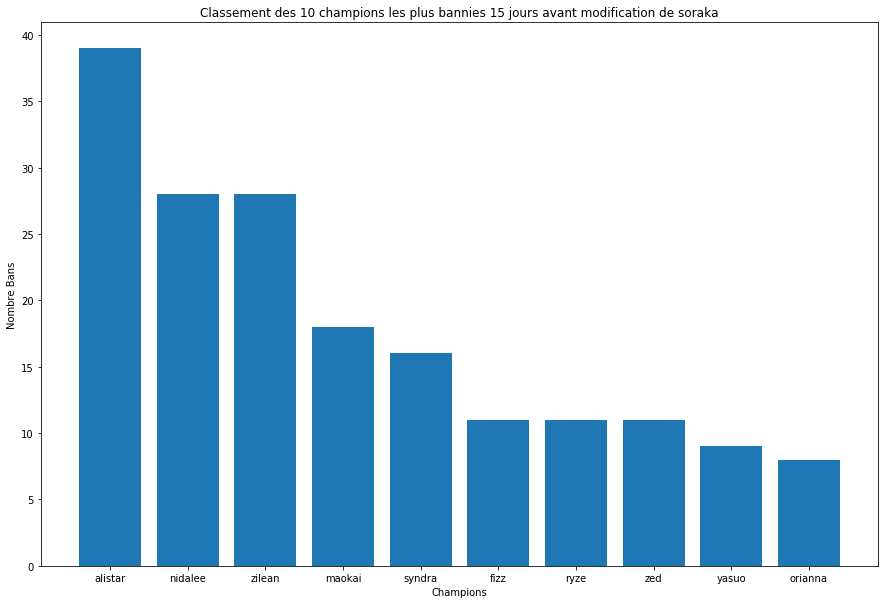

Le champions soraka est position [] sur 35 champions differents bannie avant modification
Le champions soraka est position [] sur 30 champions differents bannie apres modification


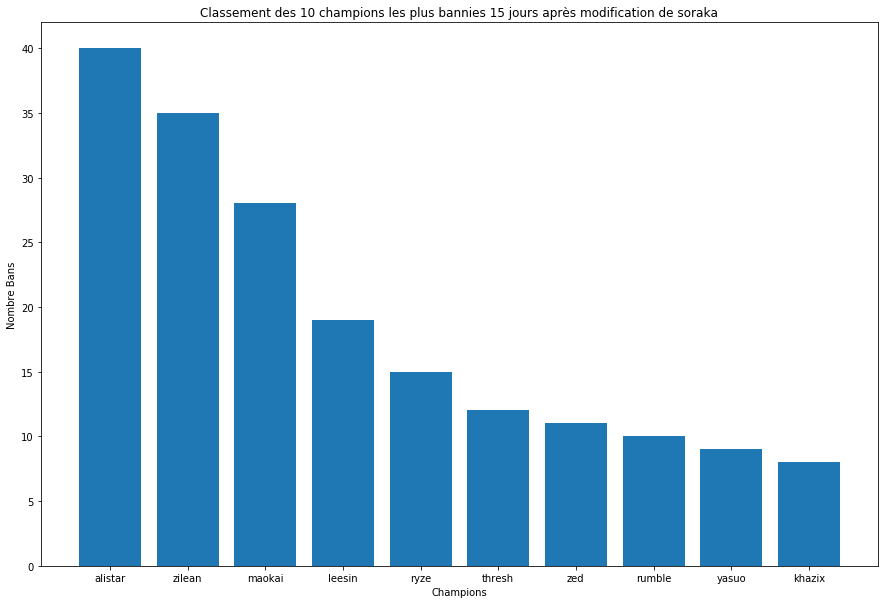

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


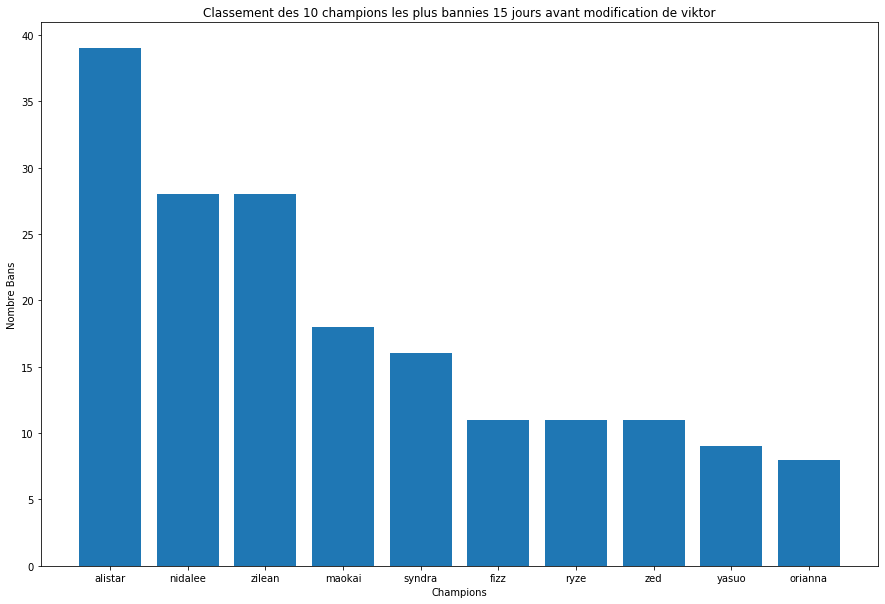

Le champions viktor est position [] sur 35 champions differents bannie avant modification
Le champions viktor est position [] sur 30 champions differents bannie apres modification


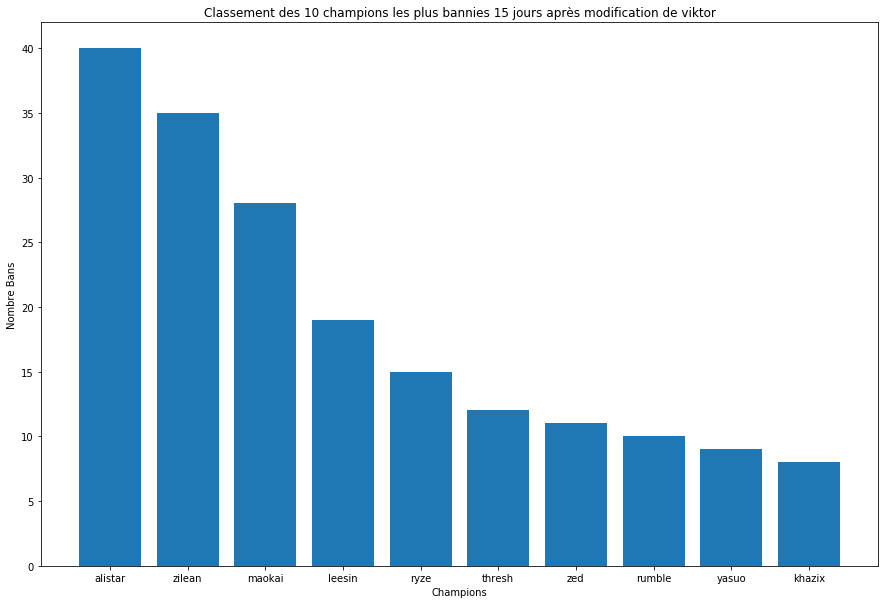

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


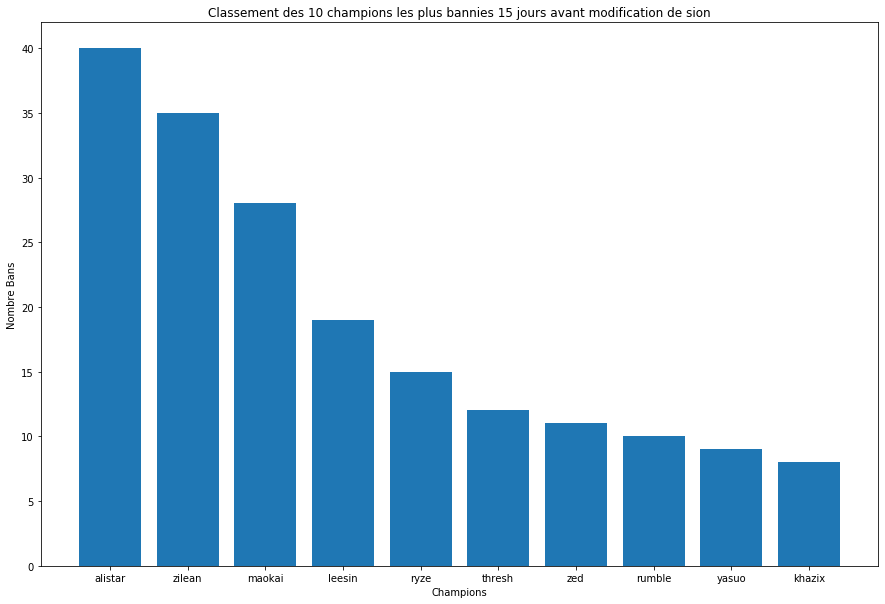

Le champions sion est position [] sur 30 champions differents bannie avant modification
Le champions sion est position [] sur 14 champions differents bannie apres modification


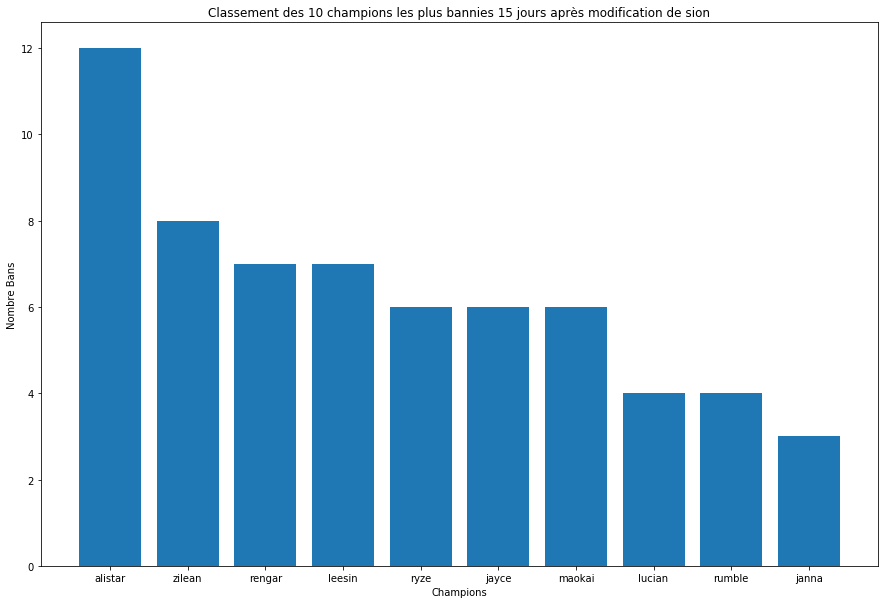

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


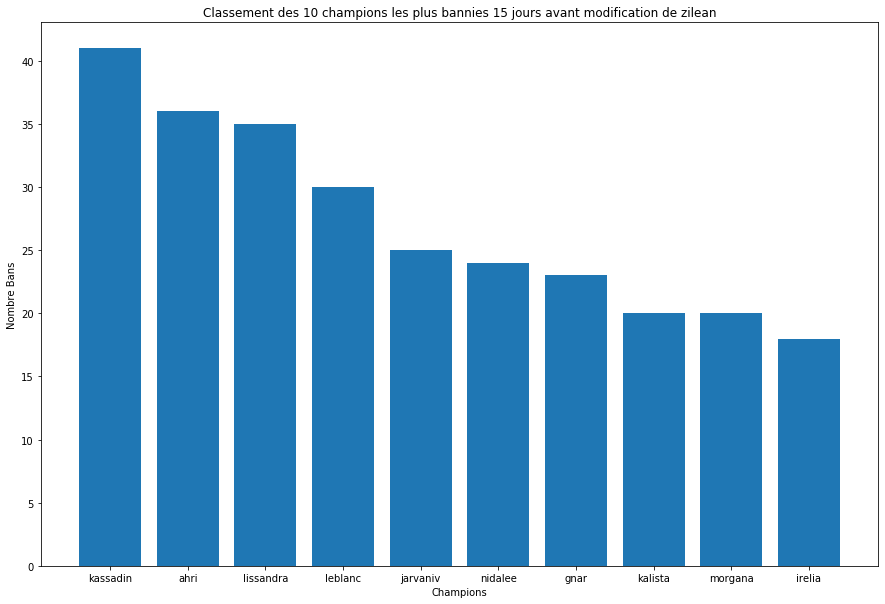

Le champions zilean est position [] sur 38 champions differents bannie avant modification
Le champions zilean est position [] sur 44 champions differents bannie apres modification


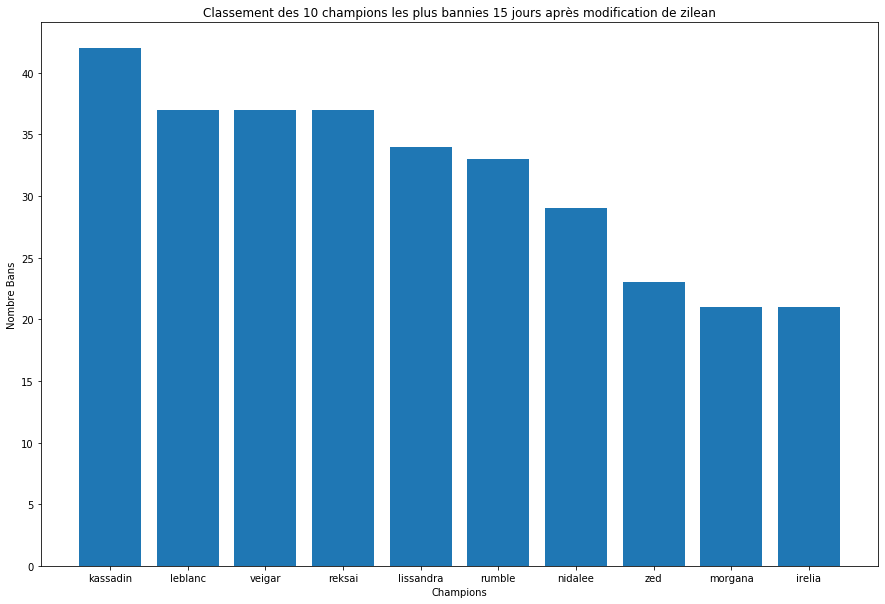

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


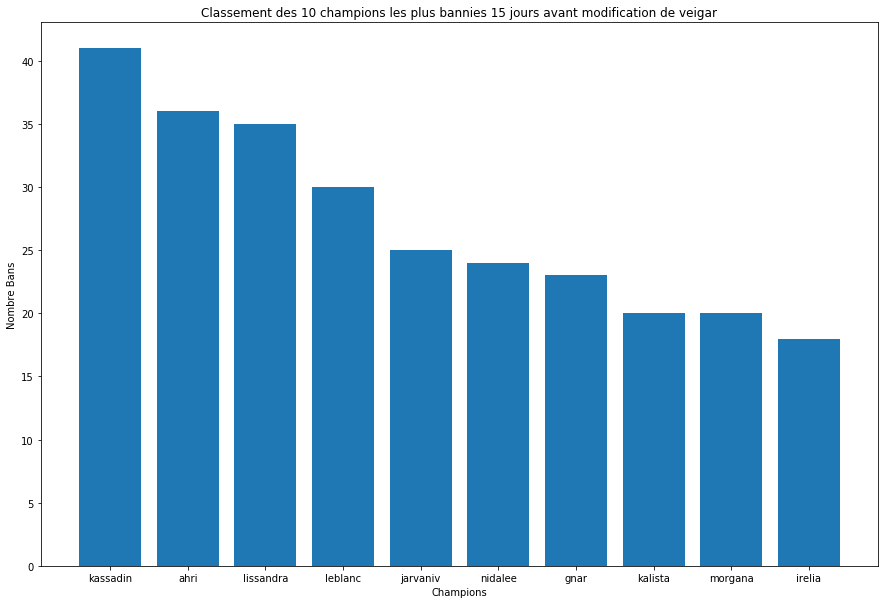

Le champions veigar est position [30] sur 38 champions differents bannie avant modification
Le champions veigar est position [3] sur 44 champions differents bannie apres modification


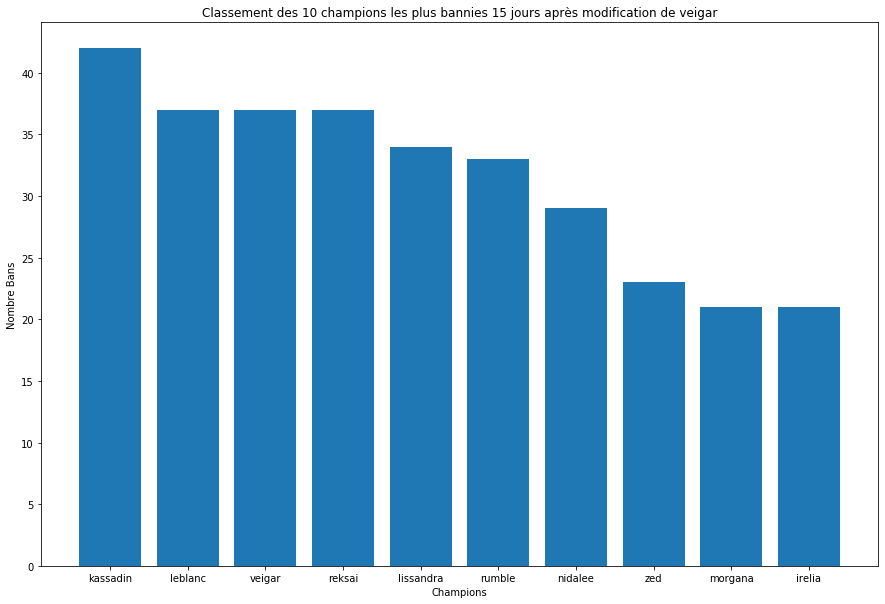

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


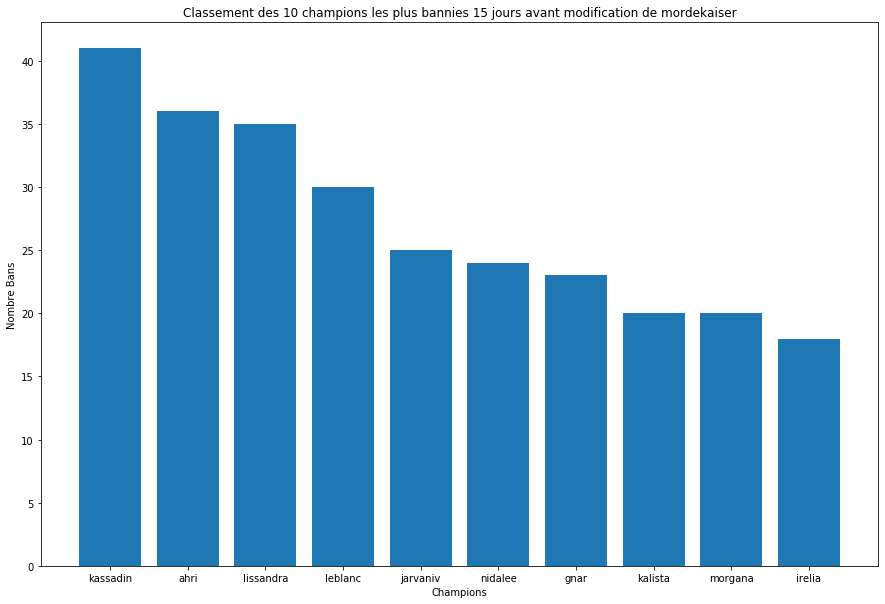

Le champions mordekaiser est position [] sur 38 champions differents bannie avant modification
Le champions mordekaiser est position [] sur 44 champions differents bannie apres modification


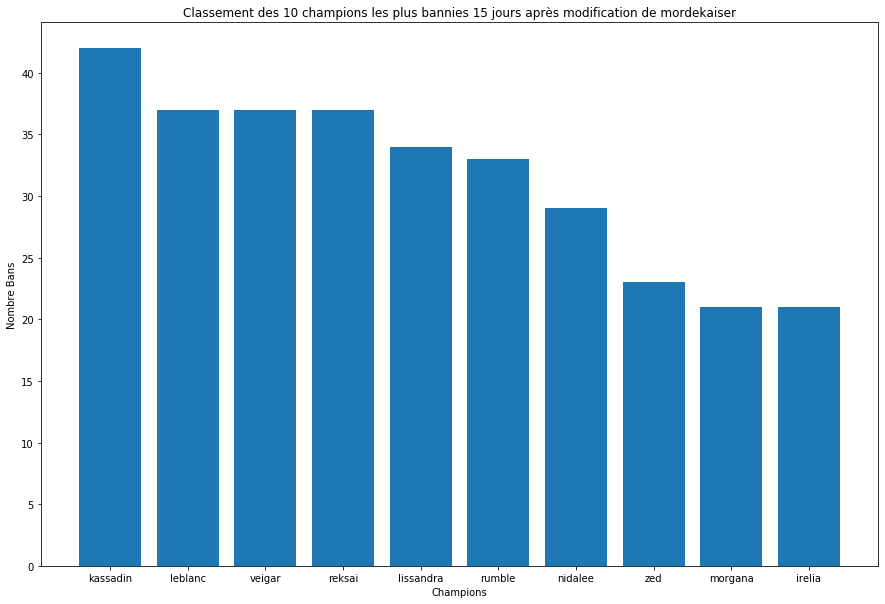

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


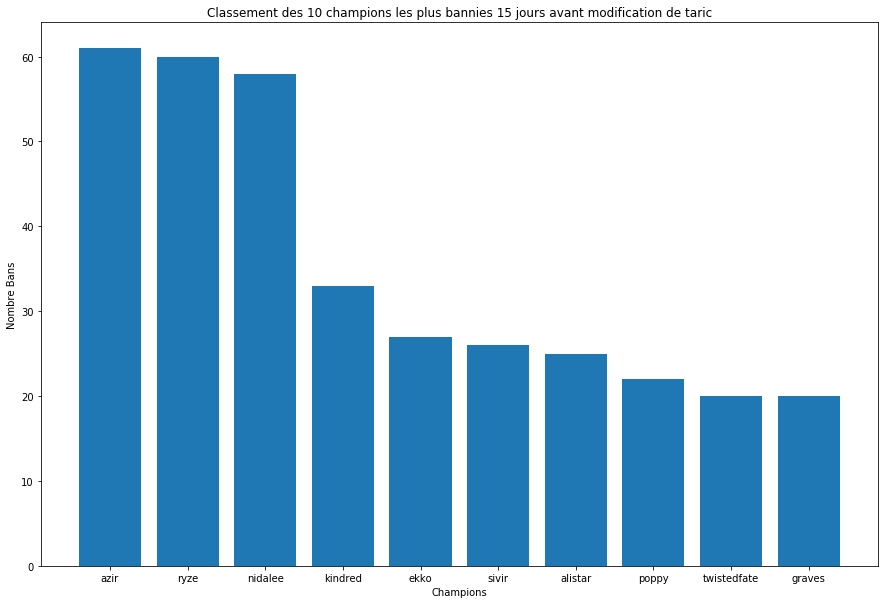

Le champions taric est position [43] sur 55 champions differents bannie avant modification
Le champions taric est position [] sur 35 champions differents bannie apres modification


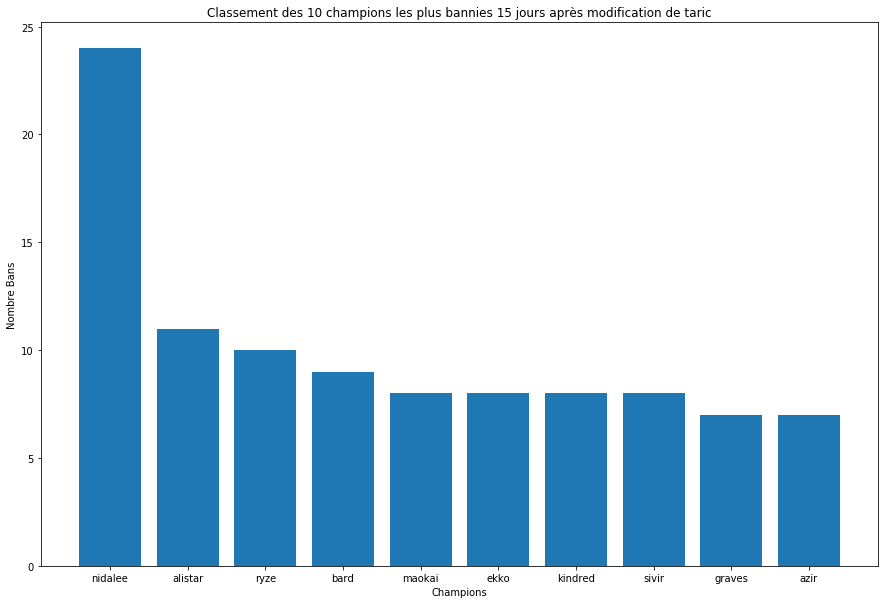

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


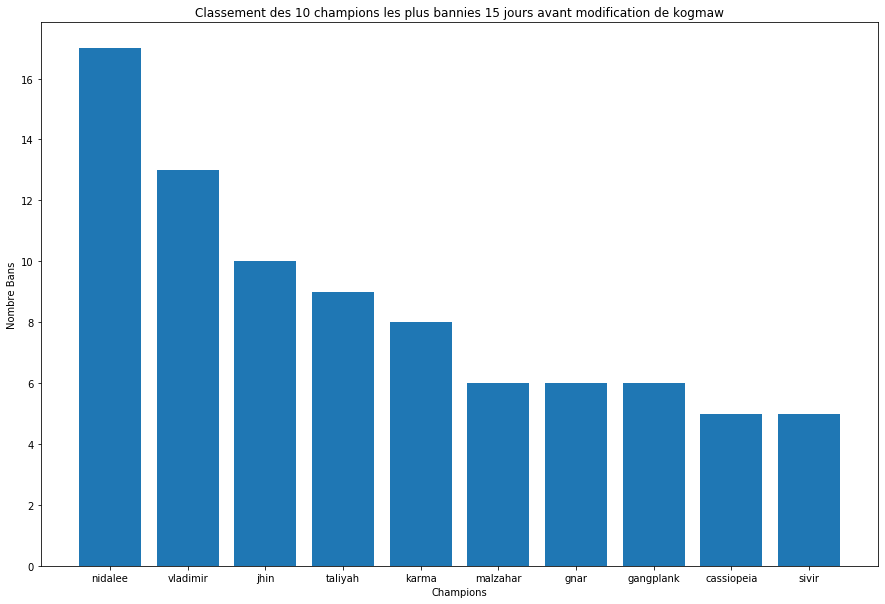

Le champions kogmaw est position [] sur 31 champions differents bannie avant modification
Le champions kogmaw est position [] sur 37 champions differents bannie apres modification


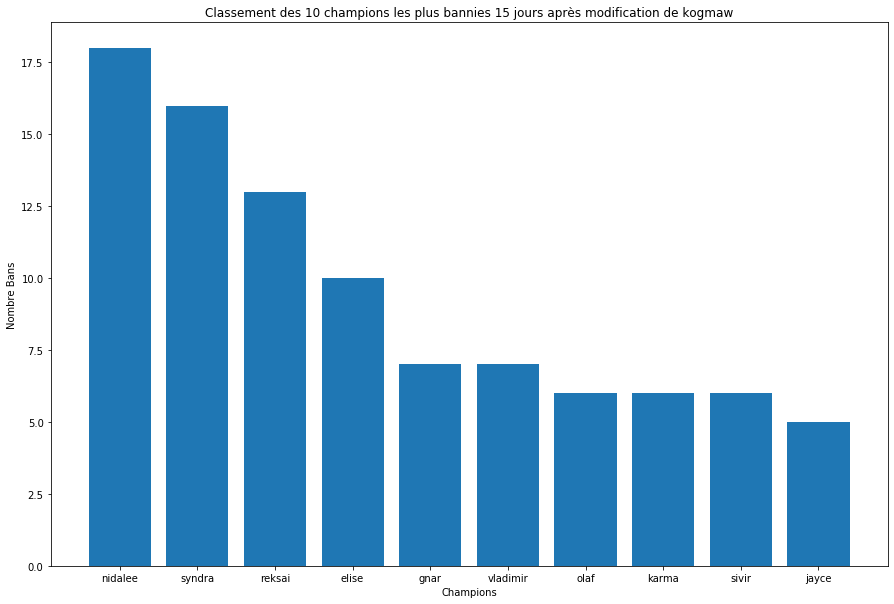

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


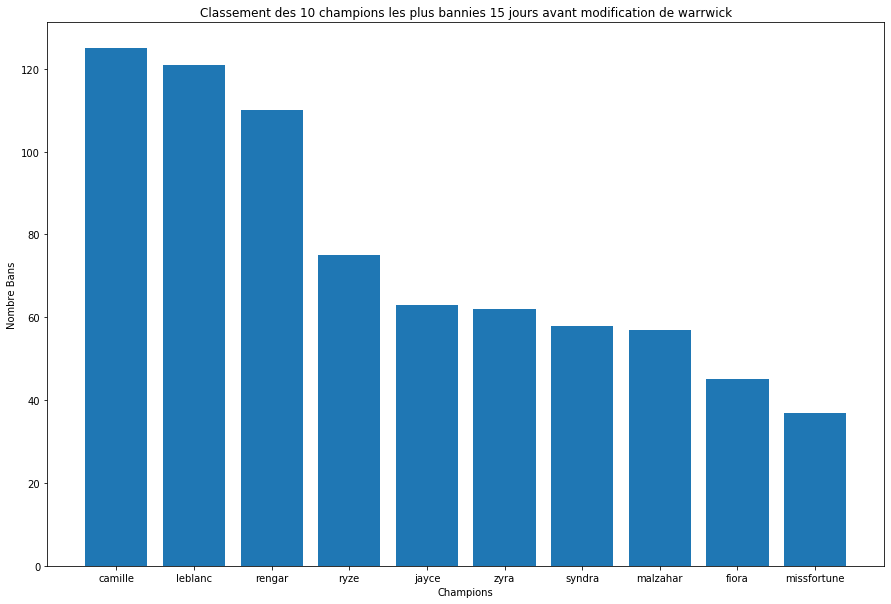

Le champions warrwick est position [] sur 64 champions differents bannie avant modification
Le champions warrwick est position [] sur 93 champions differents bannie apres modification


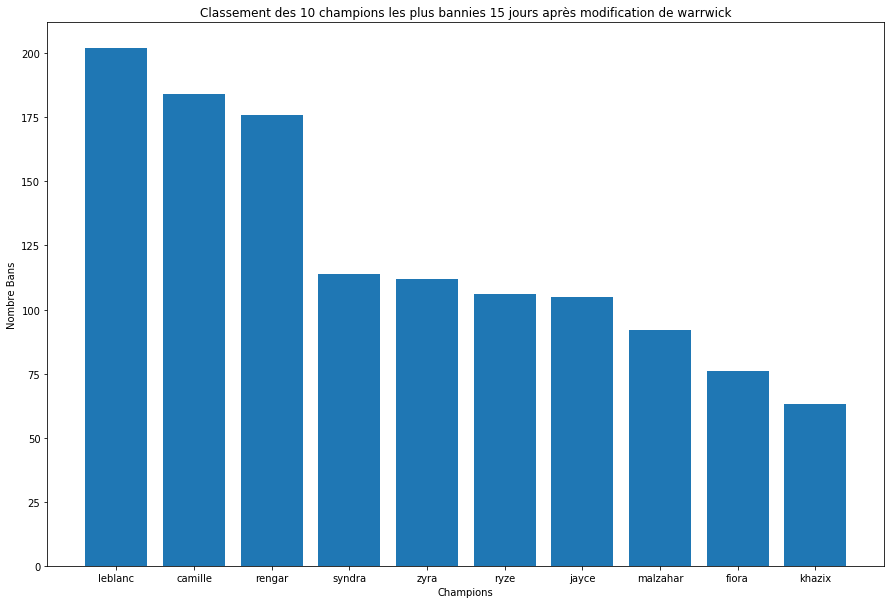

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


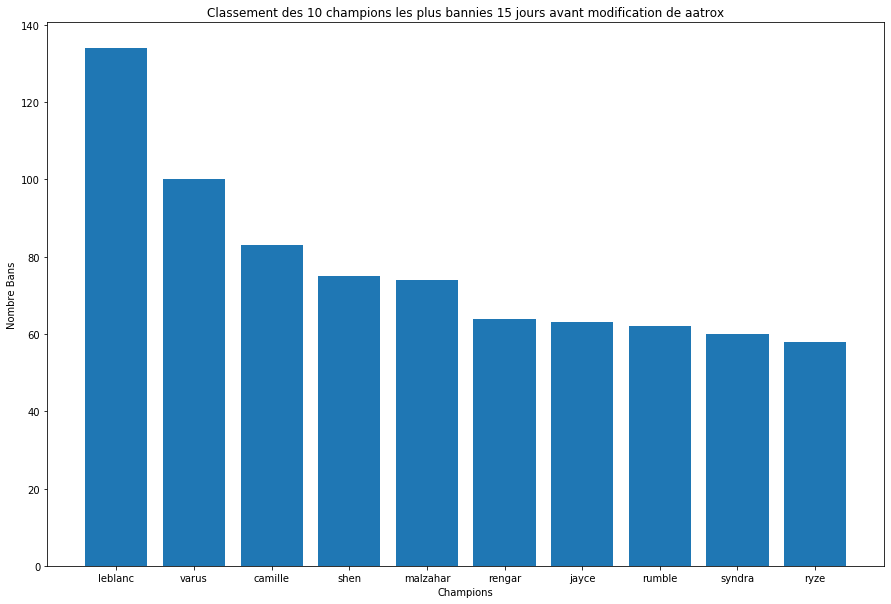

Le champions aatrox est position [] sur 82 champions differents bannie avant modification
Le champions aatrox est position [] sur 93 champions differents bannie apres modification


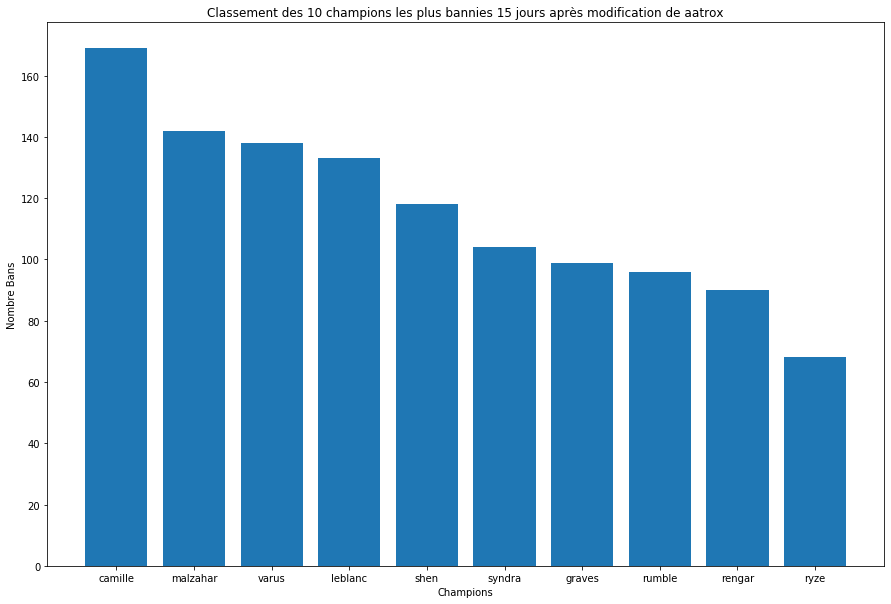

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


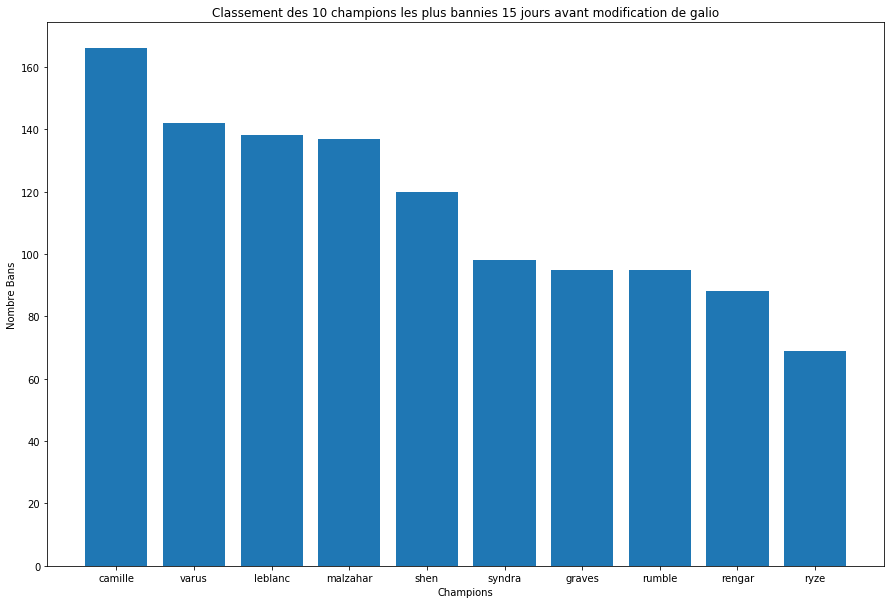

Le champions galio est position [63] sur 93 champions differents bannie avant modification
Le champions galio est position [] sur 95 champions differents bannie apres modification


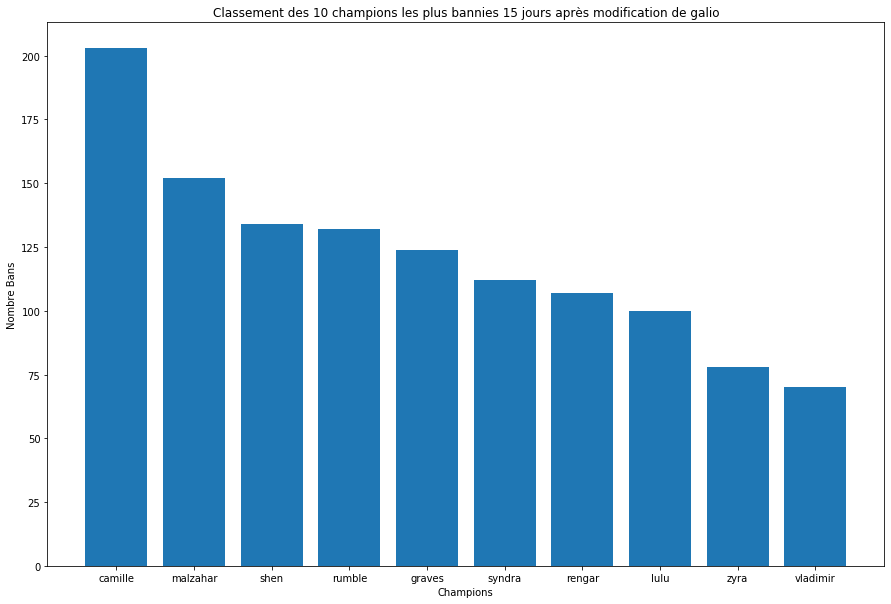

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


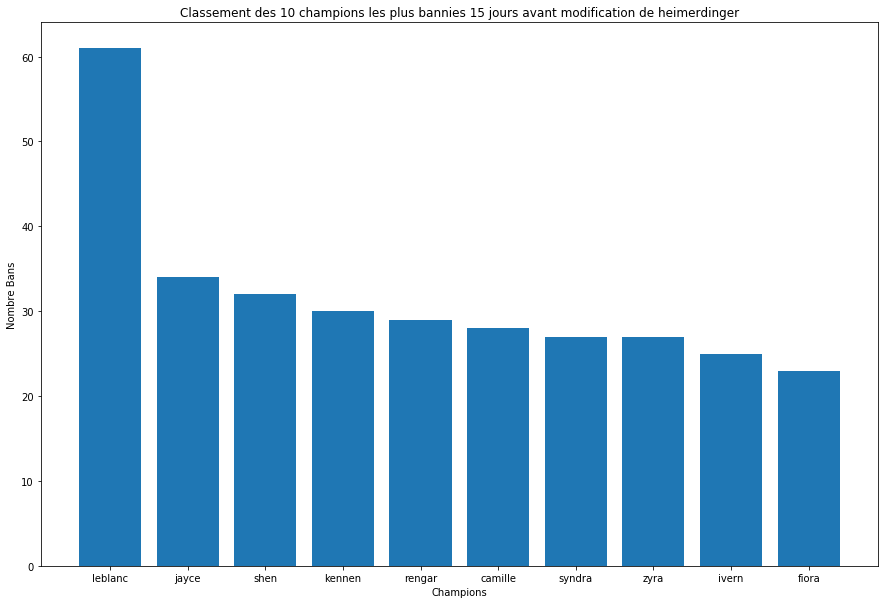

Le champions heimerdinger est position [] sur 78 champions differents bannie avant modification
Le champions heimerdinger est position [] sur 48 champions differents bannie apres modification


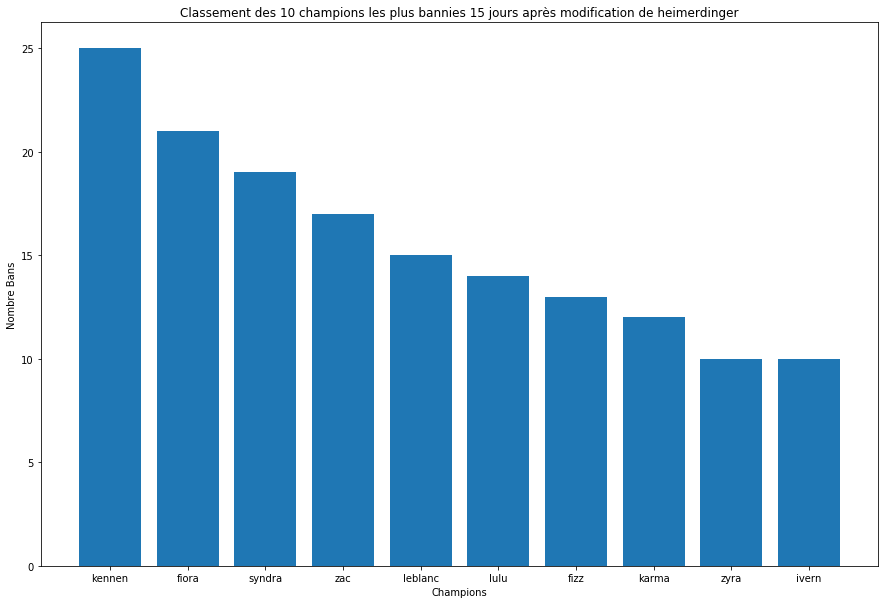

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


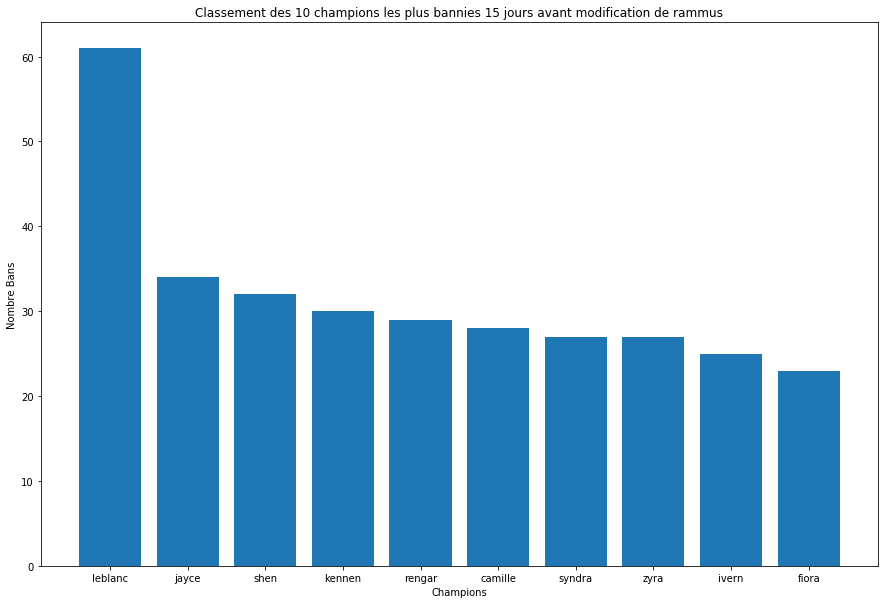

Le champions rammus est position [] sur 78 champions differents bannie avant modification
Le champions rammus est position [] sur 48 champions differents bannie apres modification


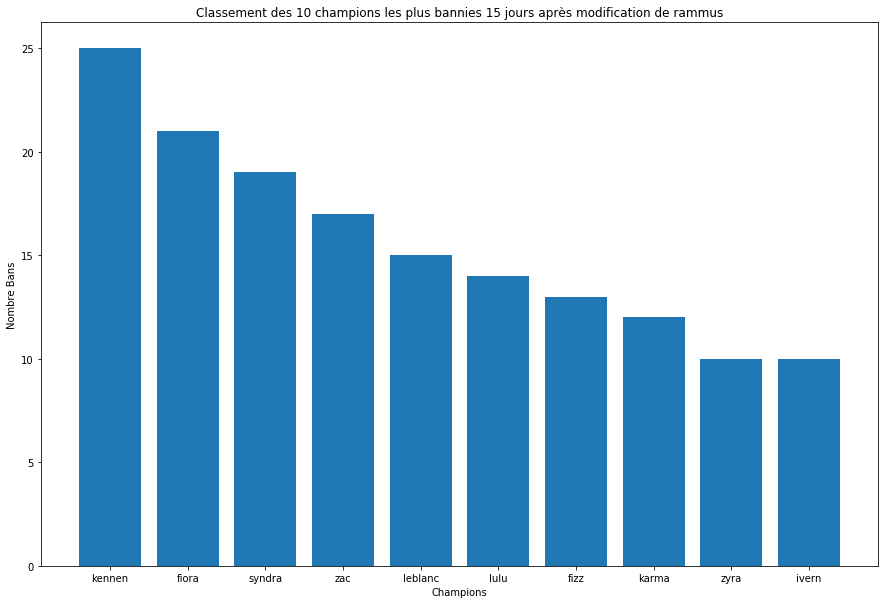

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


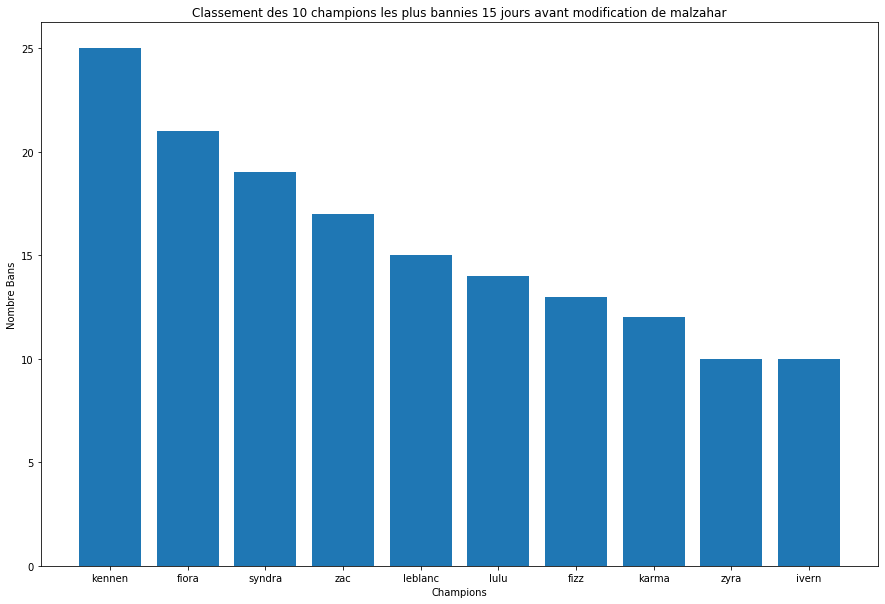

Le champions malzahar est position [] sur 48 champions differents bannie avant modification
Le champions malzahar est position [47] sur 82 champions differents bannie apres modification


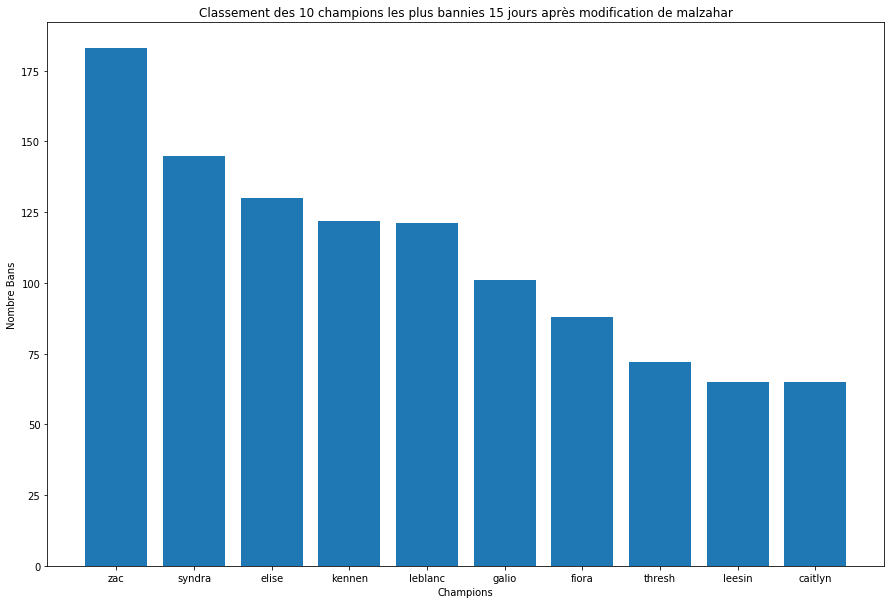

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


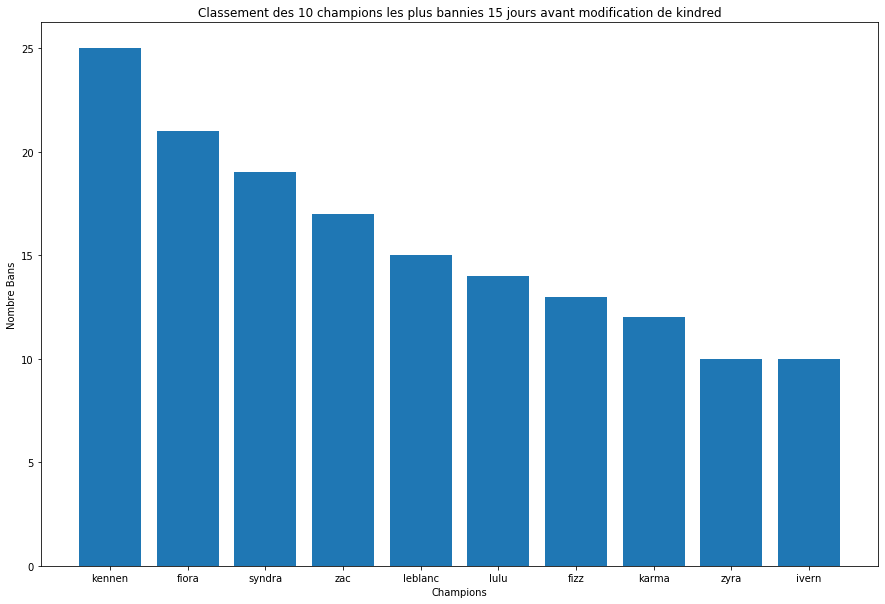

Le champions kindred est position [] sur 48 champions differents bannie avant modification
Le champions kindred est position [82] sur 82 champions differents bannie apres modification


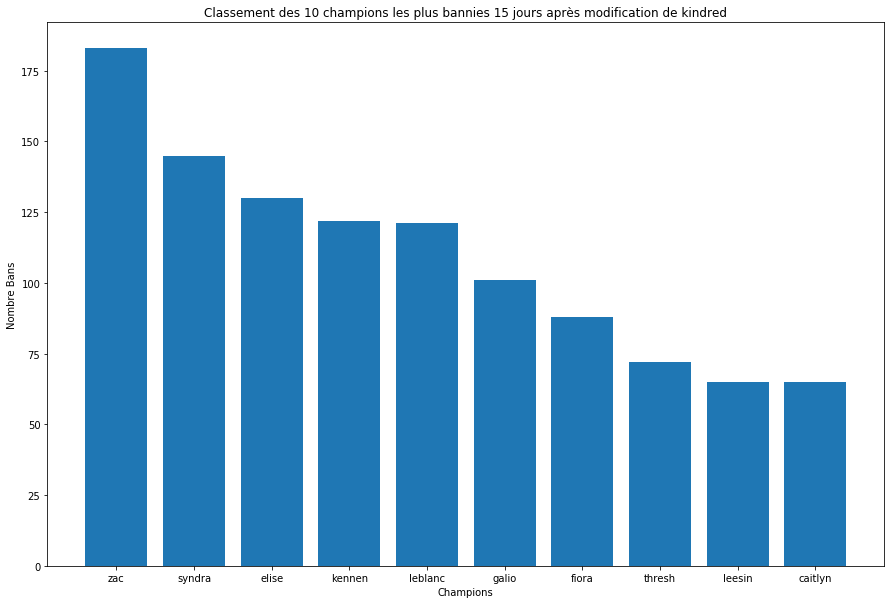

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


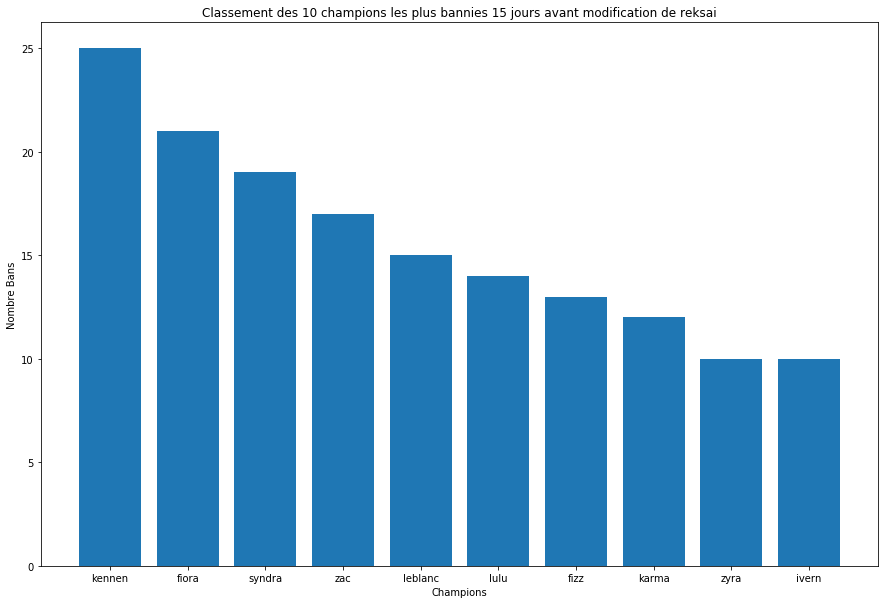

Le champions reksai est position [] sur 48 champions differents bannie avant modification
Le champions reksai est position [50] sur 82 champions differents bannie apres modification


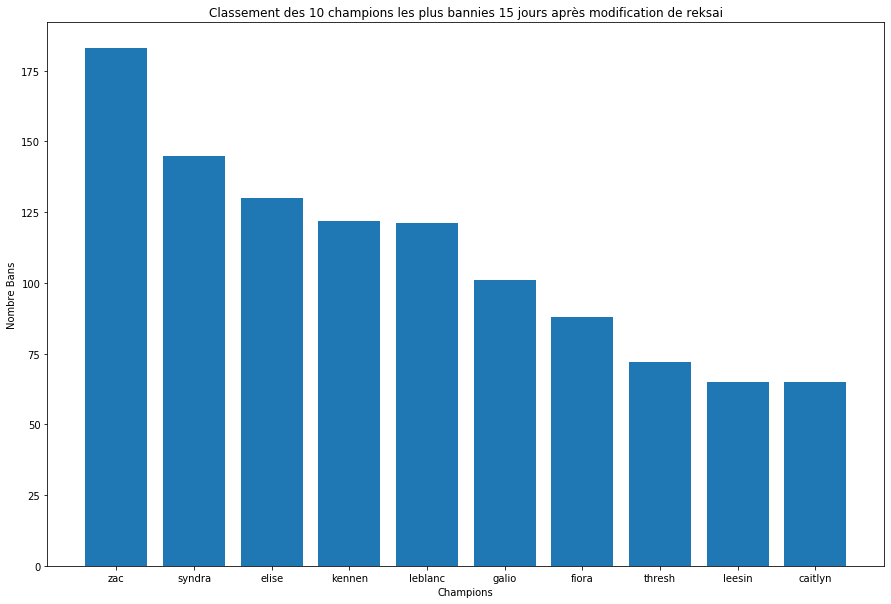

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


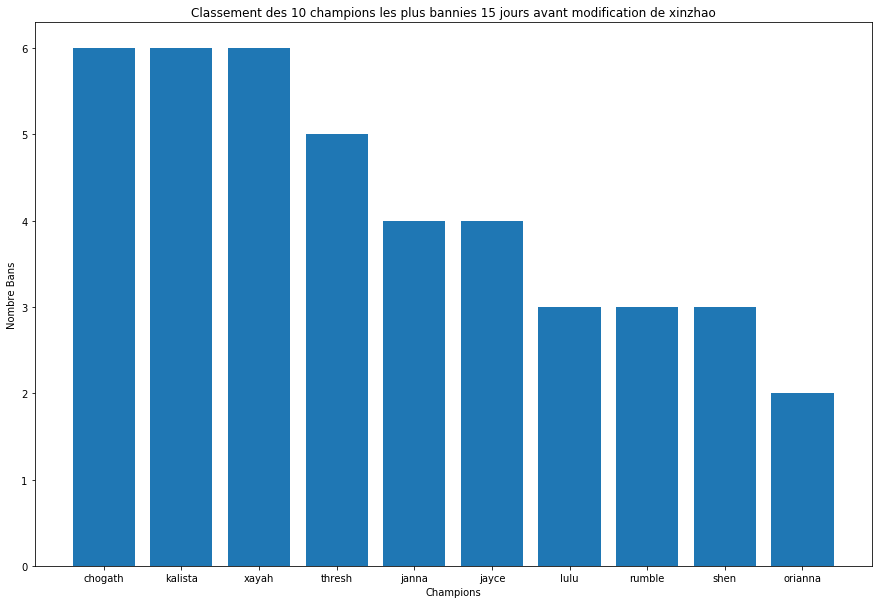

Le champions xinzhao est position [] sur 21 champions differents bannie avant modification
Le champions xinzhao est position [] sur 71 champions differents bannie apres modification


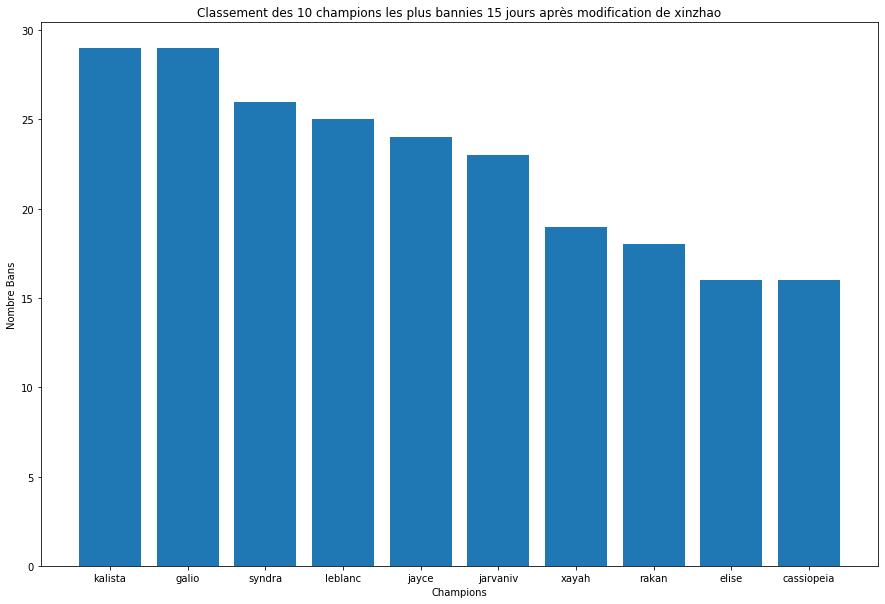

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


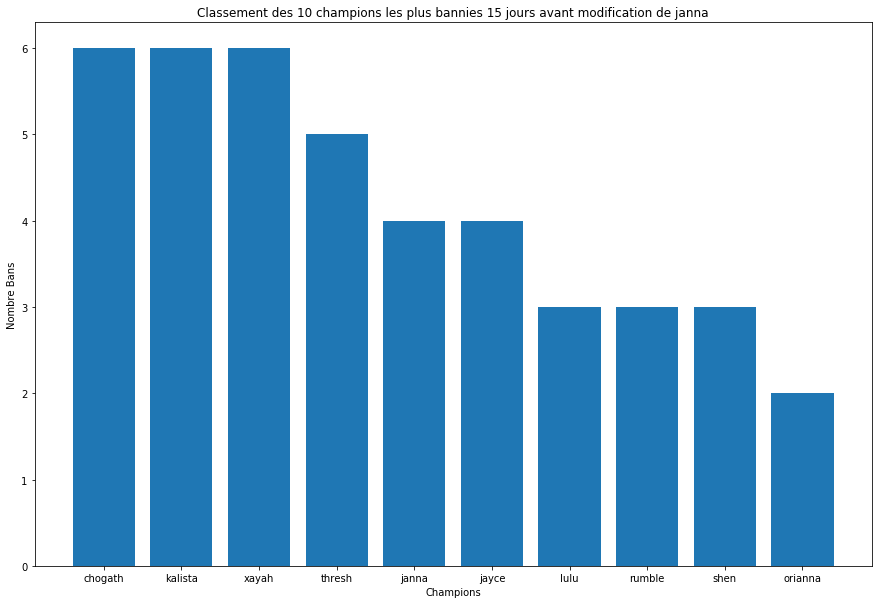

Le champions janna est position [5] sur 21 champions differents bannie avant modification
Le champions janna est position [32] sur 71 champions differents bannie apres modification


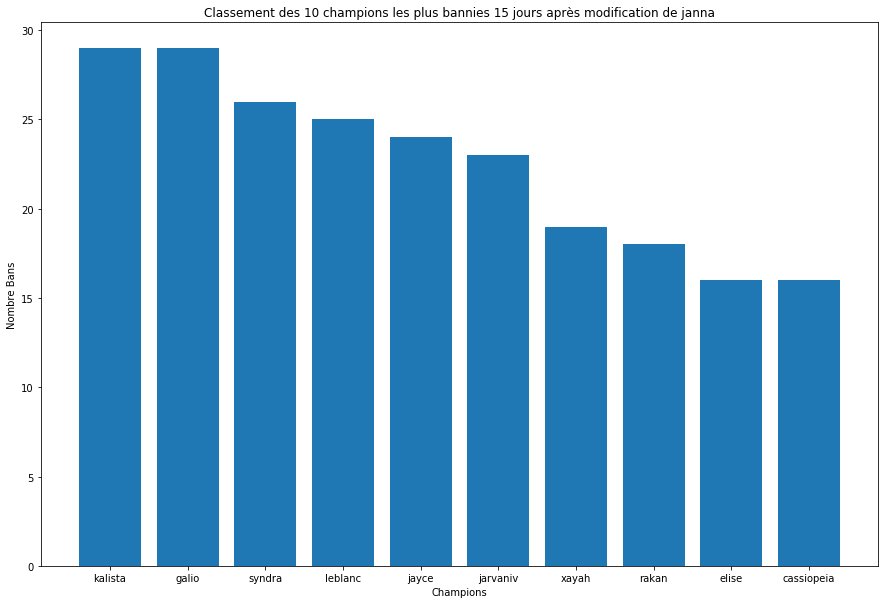

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


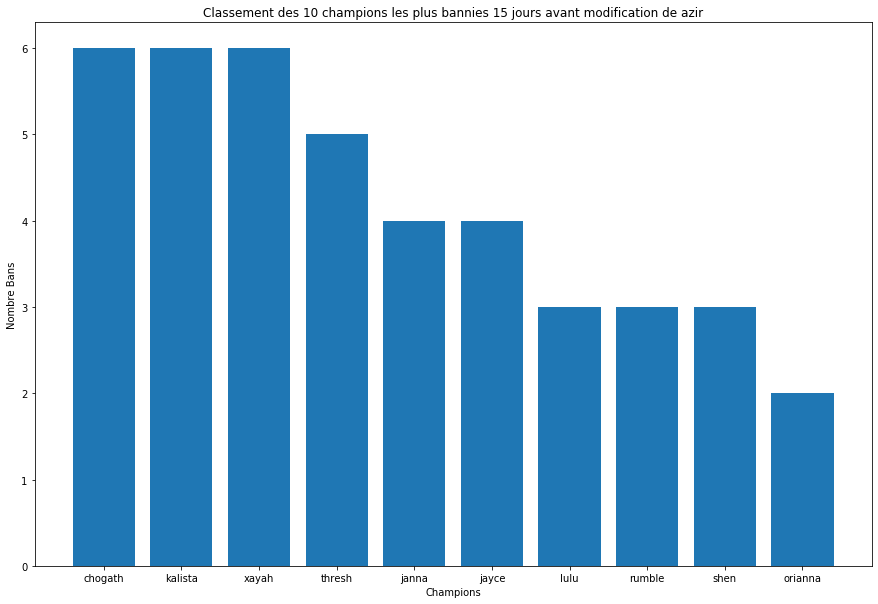

Le champions azir est position [] sur 21 champions differents bannie avant modification
Le champions azir est position [] sur 71 champions differents bannie apres modification


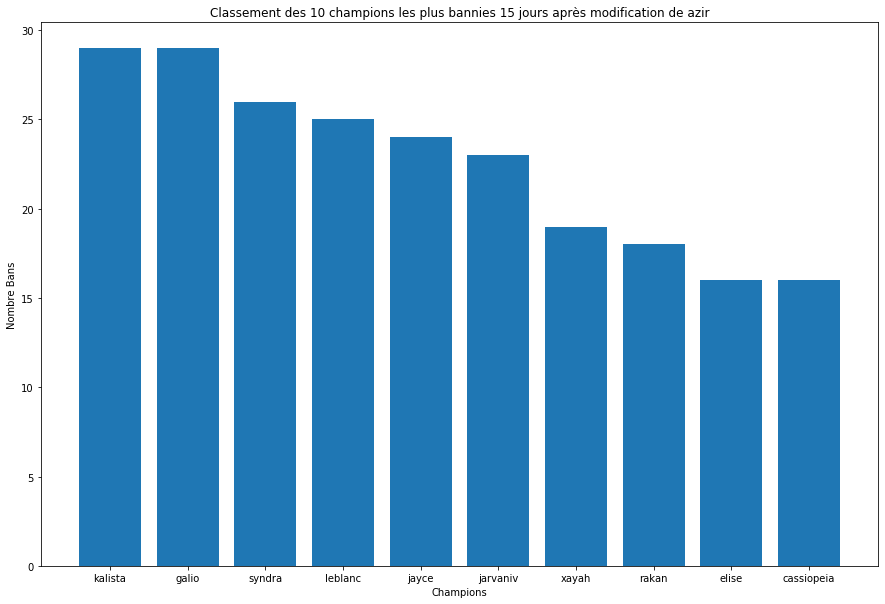

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [8]:
j = 0
for i in df_patchNotes.ChangementMajeurPersonnage:
    if not isinstance(i, float):
        nbjour = 15
        date = df_patchNotes.iloc[j].Date
        ChampionsNouveau = df_patchNotes.iloc[j].ChangementMajeurPersonnage[1:-1]
        dateplusjour = date + dt.timedelta(days=nbjour)
        datemoinsjour = date - dt.timedelta(days=nbjour)

        temp = df_bans[(df_bans.Date < date) & (df_bans.Date >= datemoinsjour)]
        temp = pd.DataFrame(temp.Champions.value_counts())
        temp = temp.sort_values(by="Champions", ascending=False)
        temp = temp.reset_index()
        temp = temp.reset_index()
        temp.columns = ["Place","Champions","NombreBan"]
        temp.Place = temp.Place+1

        plt.figure(figsize=(15,10))
        plt.title("Classement des 10 champions les plus bannies {} jours avant modification de {}".format(nbjour,ChampionsNouveau))
        plt.ylabel('Nombre Bans')
        plt.xlabel('Champions')
        plt.bar(temp.Champions.head(10),temp.NombreBan.head(10))
        plt.show()
        print("Le champions {} est position {} sur {} champions differents bannie avant modification".format(ChampionsNouveau ,temp[temp.Champions == ChampionsNouveau].Place.values, len(temp)))
        
        temp = df_bans[(df_bans.Date < dateplusjour) & (df_bans.Date >= date)]
        temp = pd.DataFrame(temp.Champions.value_counts())
        temp = temp.sort_values(by="Champions", ascending=False)
        temp = temp.reset_index()
        temp = temp.reset_index()
        temp.columns = ["Place","Champions","NombreBan"]
        temp.Place = temp.Place+1

        plt.figure(figsize=(15,10))
        plt.title("Classement des 10 champions les plus bannies {} jours après modification de {}".format(nbjour,ChampionsNouveau))
        plt.ylabel('Nombre Bans')
        plt.xlabel('Champions')
        plt.bar(temp.Champions.head(10),temp.NombreBan.head(10))
        print("Le champions {} est position {} sur {} champions differents bannie apres modification".format(ChampionsNouveau ,temp[temp.Champions == ChampionsNouveau].Place.values, len(temp)))
        plt.show()
        print("------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
        
    j+=1
        
        
        
        
        
        
        
        

In [9]:
df_patchNotes.NvxPersonnage.head(20)

0          [azir]
1             NaN
2             NaN
3             NaN
4             NaN
5             NaN
6             NaN
7             NaN
8             NaN
9             NaN
10         [bard]
11            NaN
12            NaN
13            NaN
14            NaN
15         [ekko]
16            NaN
17            NaN
18    [tahmkench]
19            NaN
Name: NvxPersonnage, dtype: object

In [10]:
# champ = df_patchNotes.iloc[10].NvxPersonnage
# indexChamp = df_patchNotes[df_patchNotes.NvxPersonnage == champ].index[0]
# ChampionsNouveau = champ[1:-1]
# ChampionsNouveau

In [11]:
# champ

In [12]:
# indexChamp

In [13]:
# dateajoutchampions = df_patchNotes.iloc[indexChamp].Date
# dateajoutchampions 

In [14]:
# date = df_patchNotes.iloc[10].Date
# date

In [15]:
# dateplusjour = date + dt.timedelta(days=nbjour)

# dateplusjour

In [16]:
# temp = df_bans[(df_bans.Date < dateplusjour) &  (df_bans.Date >= dateajoutchampions)]
# temp

In [17]:
# df_bans.Date[0]

[azir]
Le champions azir est position [21] sur 134 champions differents bannie apres ajouts


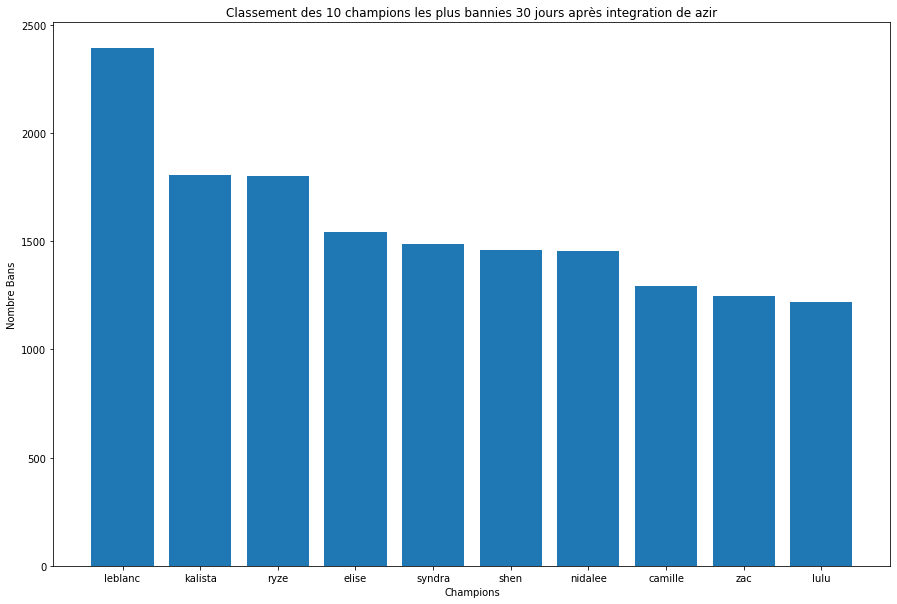

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
[bard]
Le champions bard est position [46] sur 134 champions differents bannie apres ajouts


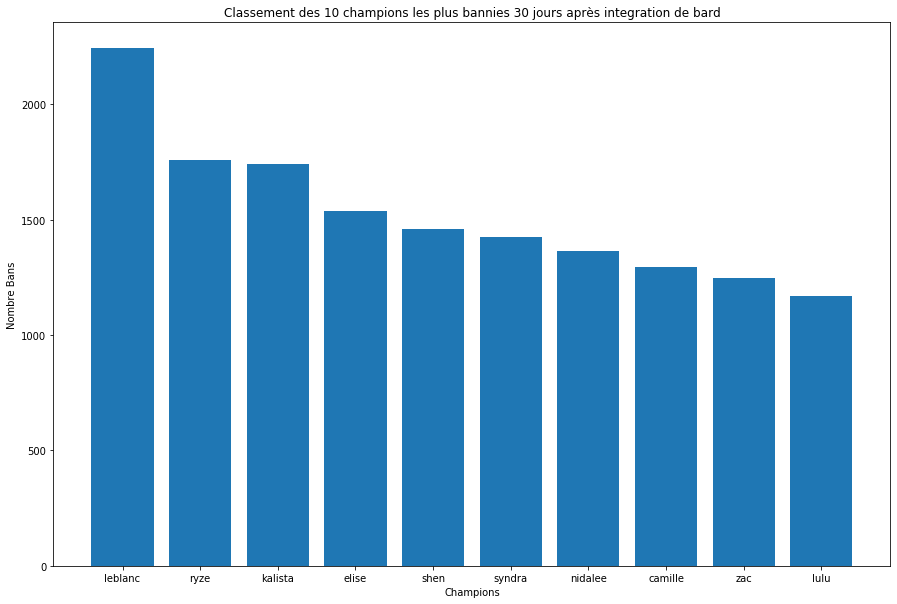

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
[ekko]
Le champions ekko est position [54] sur 134 champions differents bannie apres ajouts


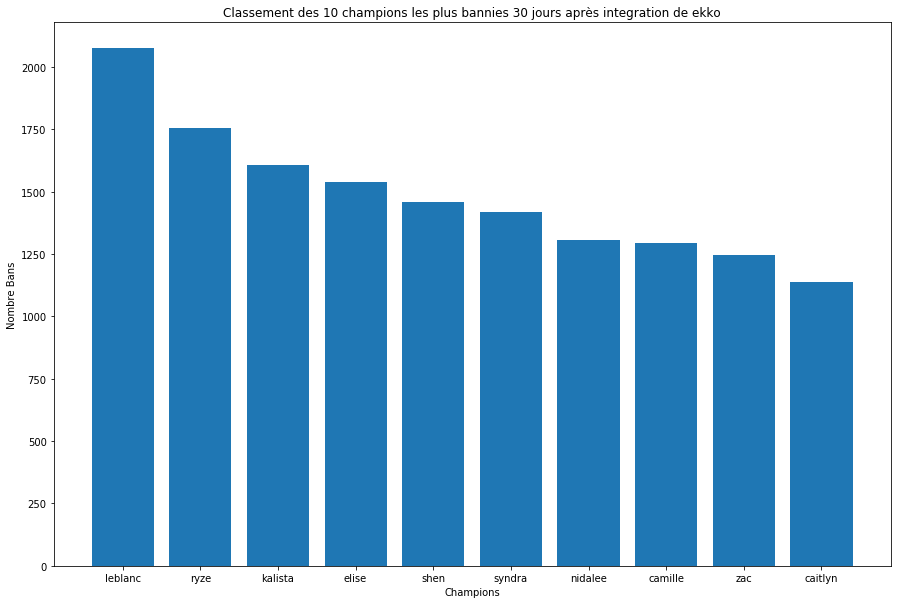

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
[tahmkench]
Le champions tahmkench est position [30] sur 134 champions differents bannie apres ajouts


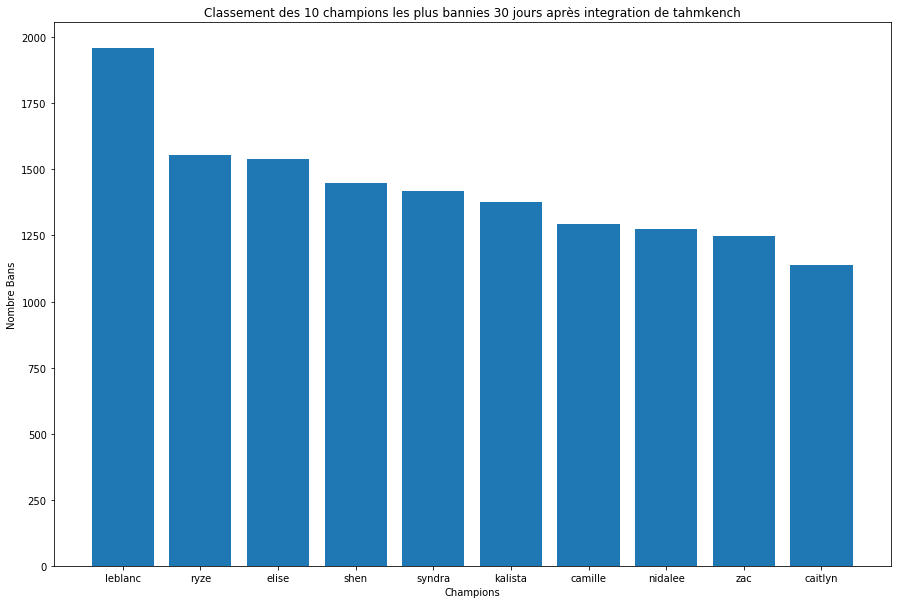

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
[kindred]
Le champions kindred est position [44] sur 133 champions differents bannie apres ajouts


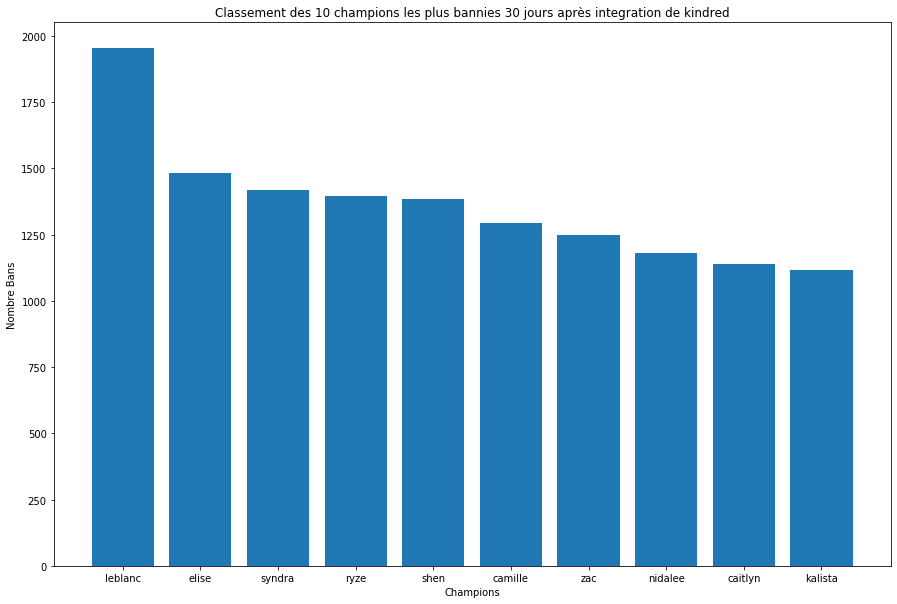

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
[jhin]
Le champions jhin est position [44] sur 133 champions differents bannie apres ajouts


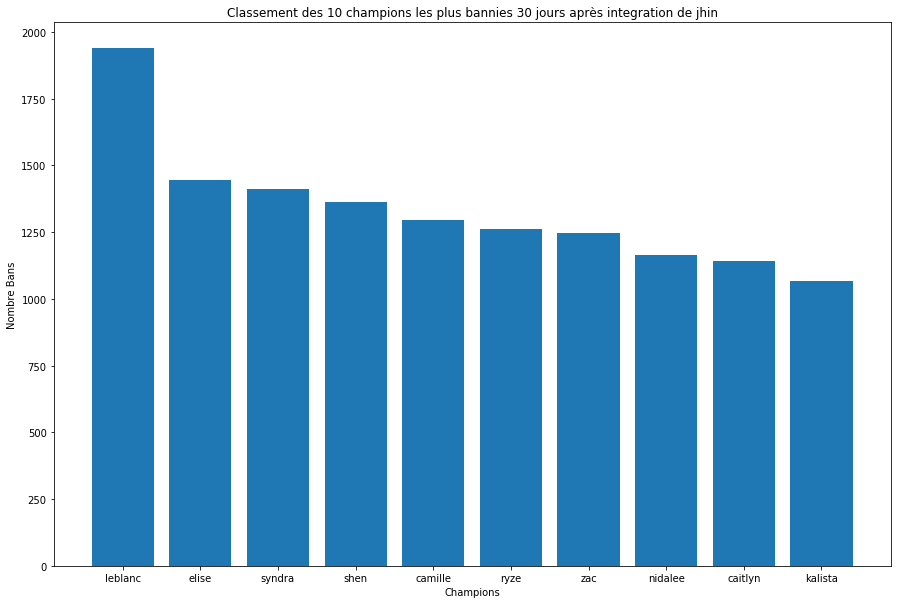

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
[aurelionsol]
Le champions aurelionsol est position [59] sur 132 champions differents bannie apres ajouts


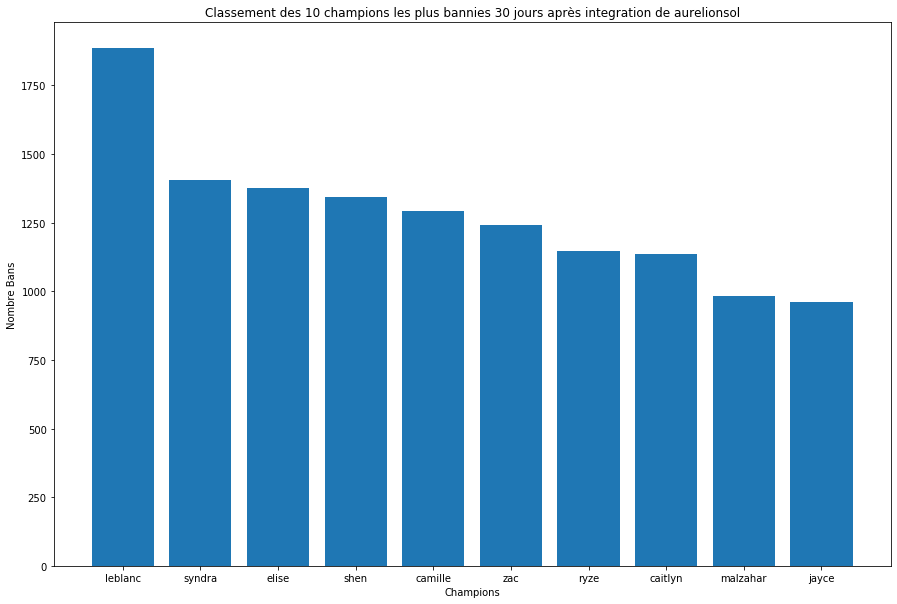

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
[taliyah]
Le champions taliyah est position [18] sur 132 champions differents bannie apres ajouts


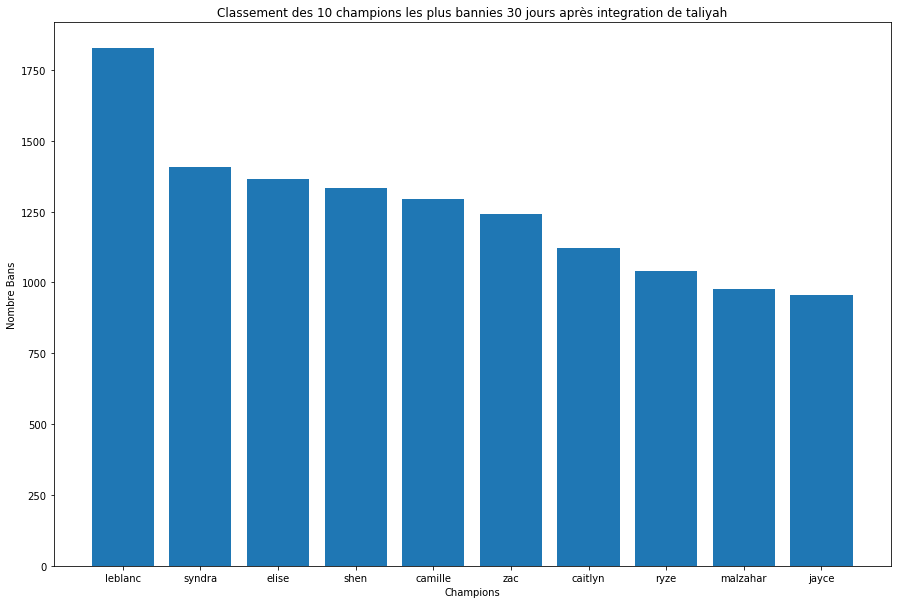

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
[kled]
Le champions kled est position [50] sur 128 champions differents bannie apres ajouts


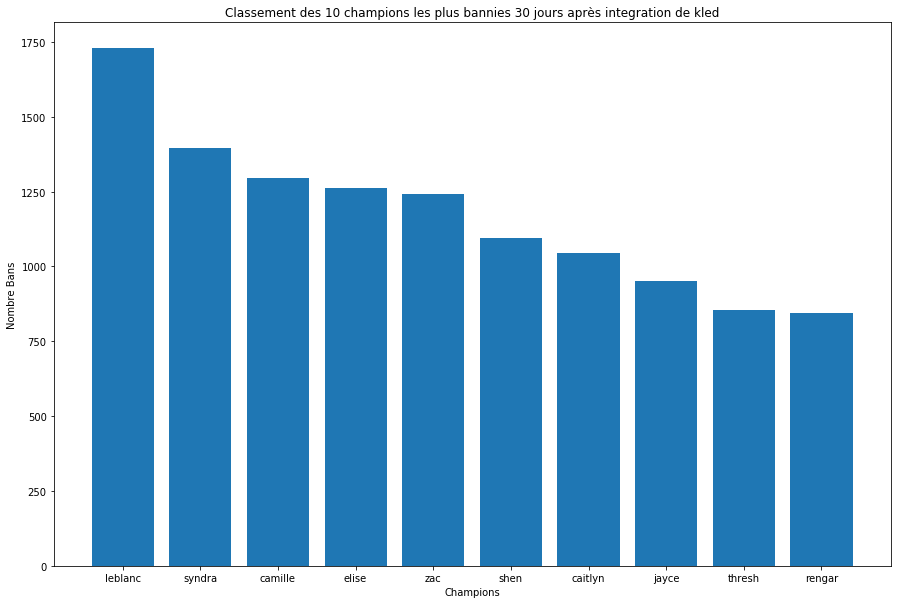

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
[ivern]
Le champions ivern est position [35] sur 128 champions differents bannie apres ajouts


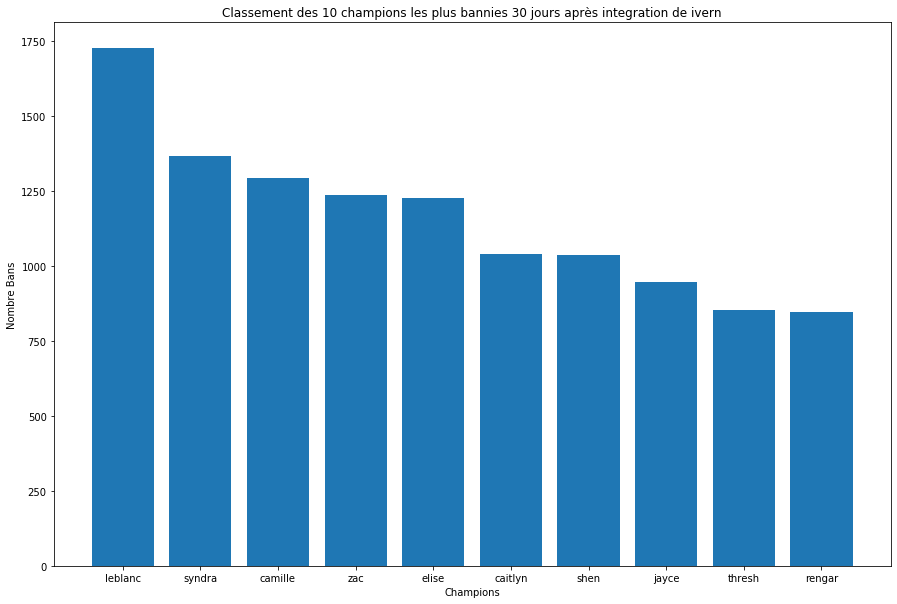

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
[xayah]
Le champions xayah est position [21] sur 118 champions differents bannie apres ajouts


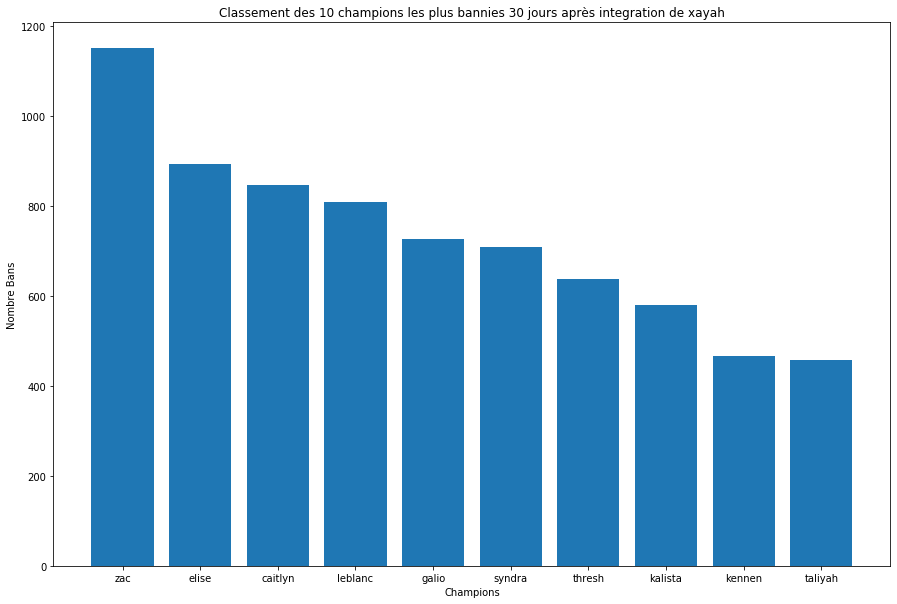

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
[rakan]
Le champions rakan est position [17] sur 118 champions differents bannie apres ajouts


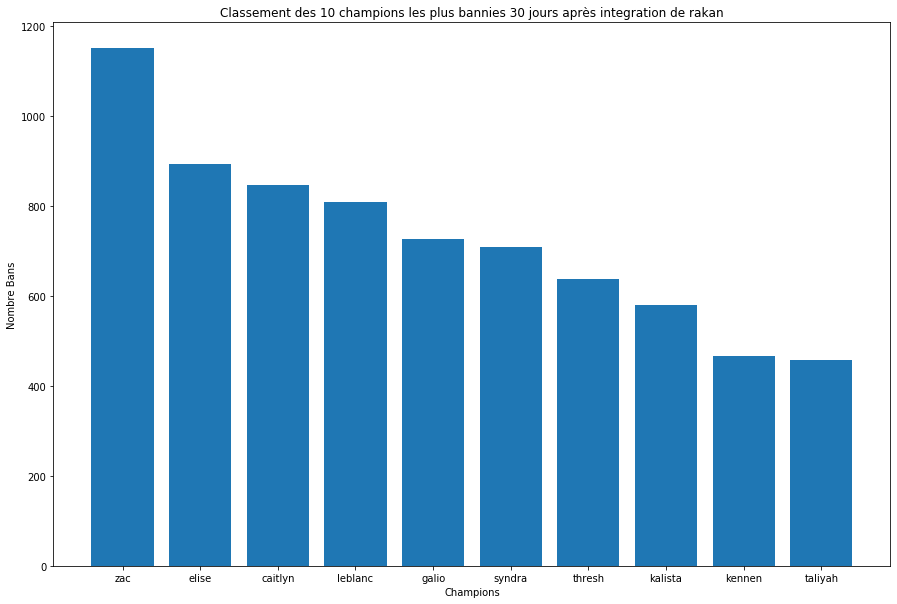

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
[kayn]
Le champions kayn est position [62] sur 112 champions differents bannie apres ajouts


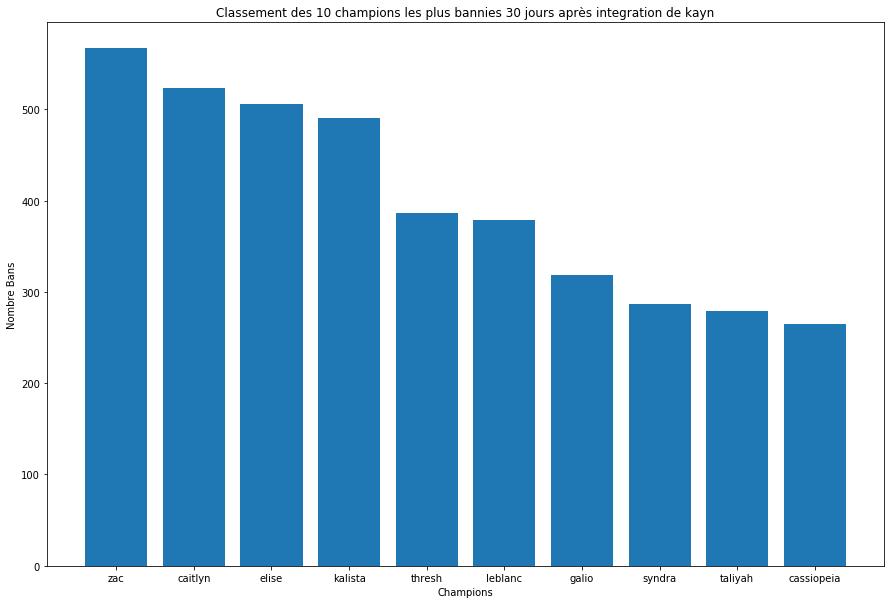

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
[ornn]
Le champions ornn est position [] sur 91 champions differents bannie apres ajouts


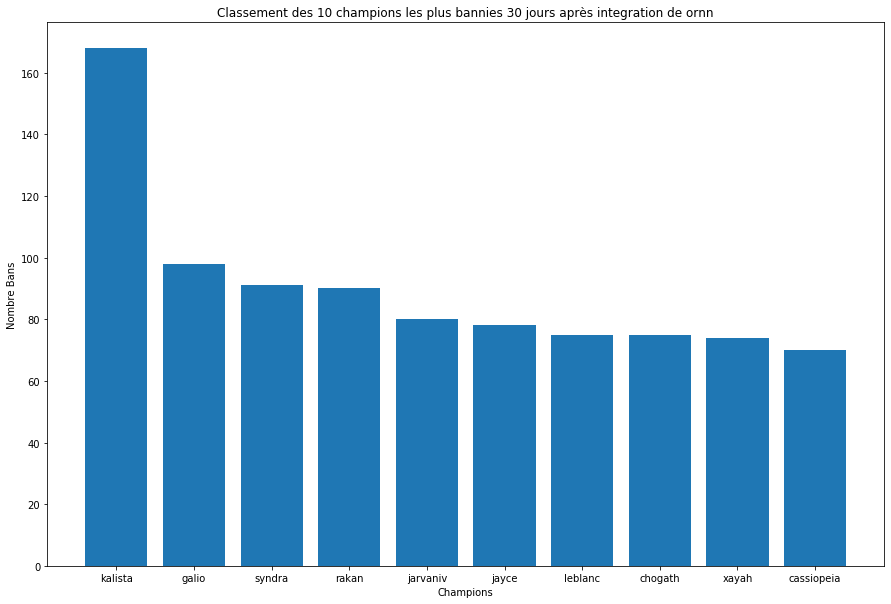

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
[evelynn]
Le champions evelynn est position [] sur 54 champions differents bannie apres ajouts


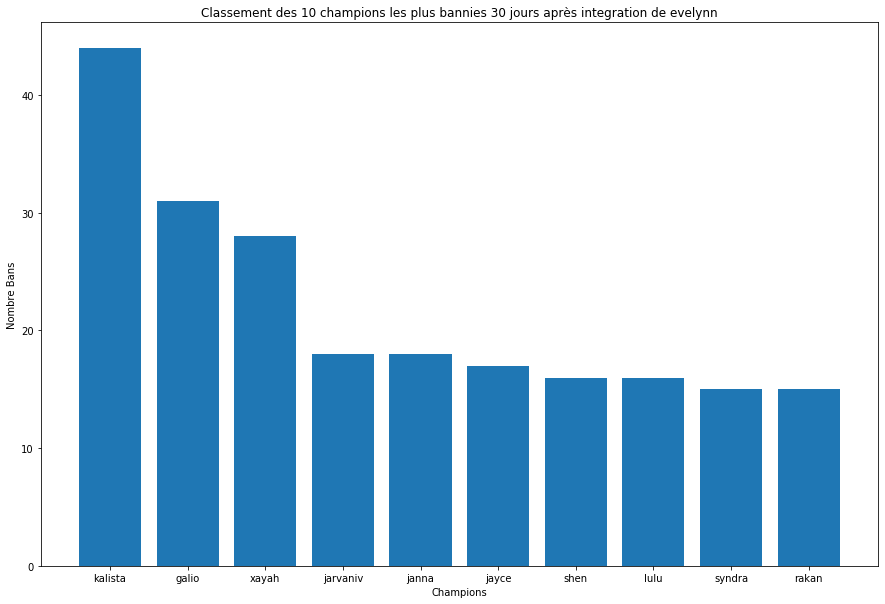

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [18]:

for i in df_patchNotes.NvxPersonnage:
    if not isinstance(i, float):
        nbjour = 30
        
        print(i)
        
        indexNouveauChamp = df_patchNotes[df_patchNotes.NvxPersonnage == i].index[0]
        dateAjoutChamp = df_patchNotes.iloc[indexNouveauChamp].Date
        nomChampAjout = df_patchNotes.iloc[indexNouveauChamp].NvxPersonnage[1:-1]
        dateplusjour = date + dt.timedelta(days=nbjour)
        
        temp = df_bans[(df_bans.Date < dateplusjour) &  (df_bans.Date >= dateAjoutChamp)]
    
        temp = pd.DataFrame(temp.Champions.value_counts())
        temp = temp.sort_values(by="Champions", ascending=False)
        temp = temp.reset_index()
        temp = temp.reset_index()
        temp.columns = ["Place","Champions","NombreBan"]
        temp.Place = temp.Place+1

        plt.figure(figsize=(15,10))
        plt.title("Classement des 10 champions les plus bannies {} jours après integration de {}".format(nbjour,nomChampAjout))
        plt.ylabel('Nombre Bans')
        plt.xlabel('Champions')
        plt.bar(temp.Champions.head(10),temp.NombreBan.head(10))
        print("Le champions {} est position {} sur {} champions differents bannie apres ajouts".format(nomChampAjout ,temp[temp.Champions == nomChampAjout].Place.values, len(temp)))
        plt.show()
        print("------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
                
        
        
        
        
        
        
        

In [19]:
df_bans.head()

,Champions,ban_pos,TeamBan,Date
0,rumble,ban_1,blueBans,2015-01-24
1,kassadin,ban_1,blueBans,2015-01-24
2,jarvaniv,ban_1,blueBans,2015-01-25
3,annie,ban_1,blueBans,2015-01-25
4,irelia,ban_1,blueBans,2015-01-25


In [20]:
df_champ.head()

,Champions,PrimaryClass,SecondaryClass,ReleaseDate
0,aatrox,Juggernaut,NaN,2013-06-13
1,ahri,Burst,NaN,2011-12-14
2,akali,Assassin,NaN,2010-05-11
3,alistar,Vanguard,NaN,2009-02-21
4,amumu,Vanguard,NaN,2009-06-26


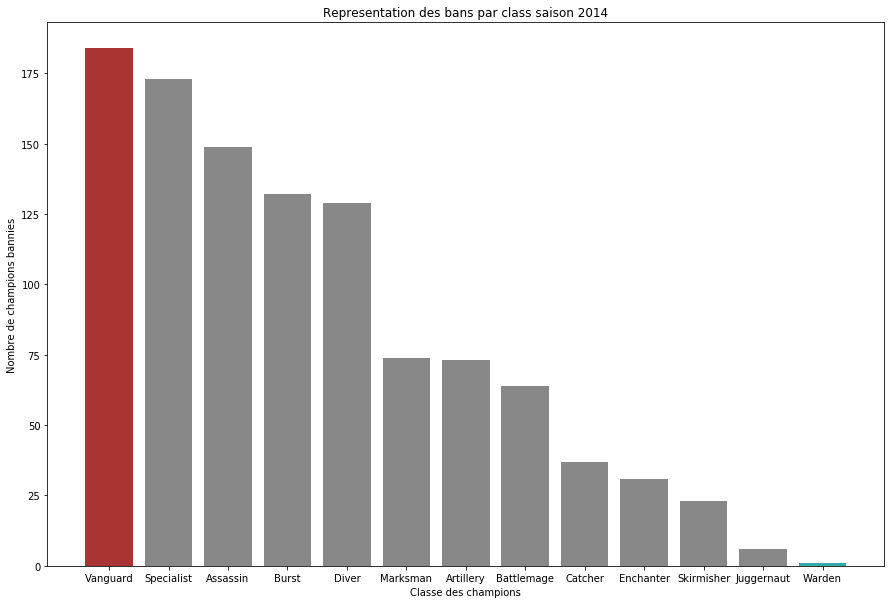

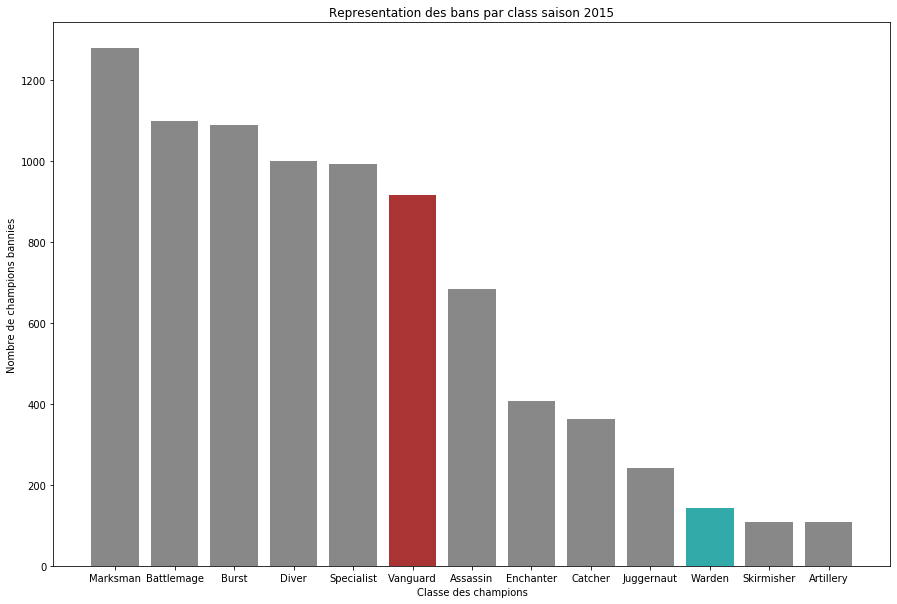

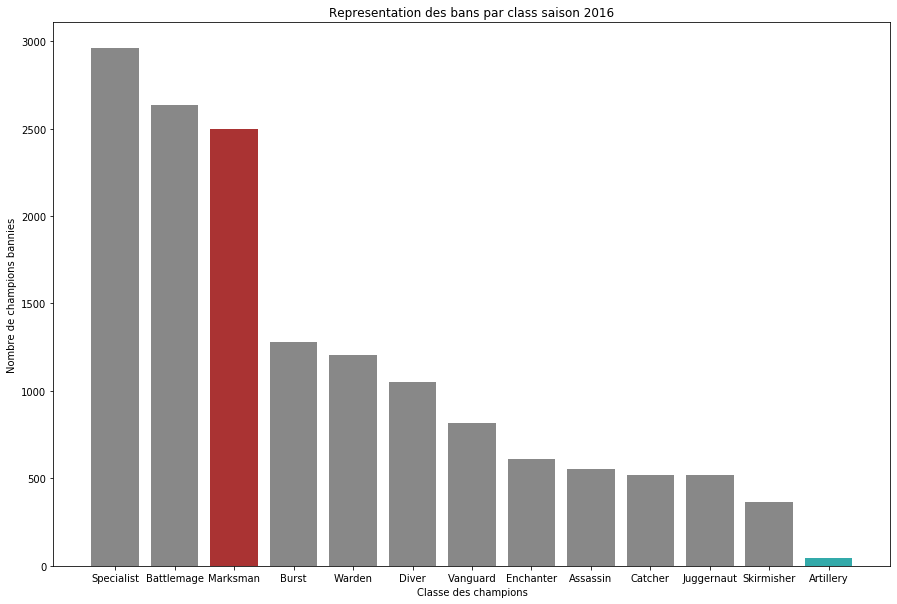

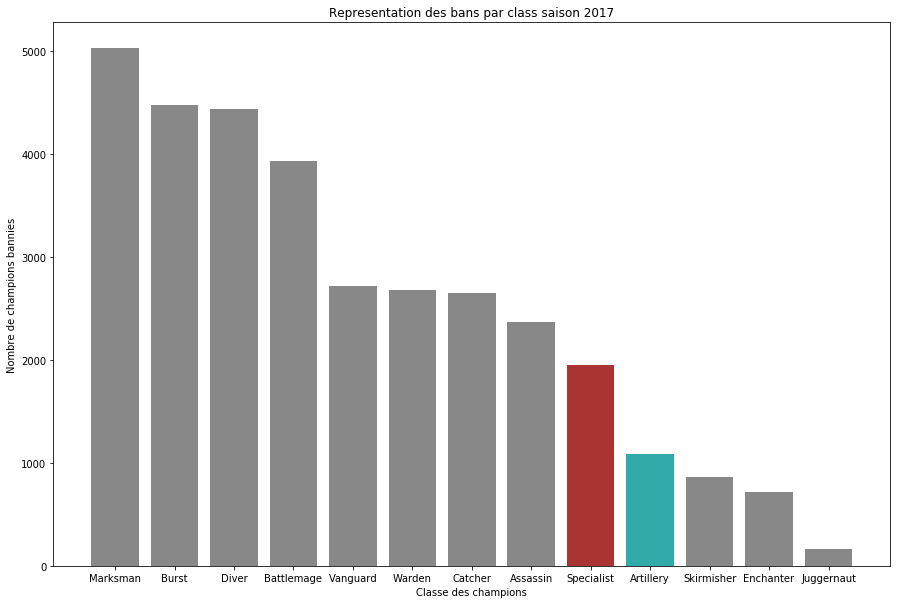

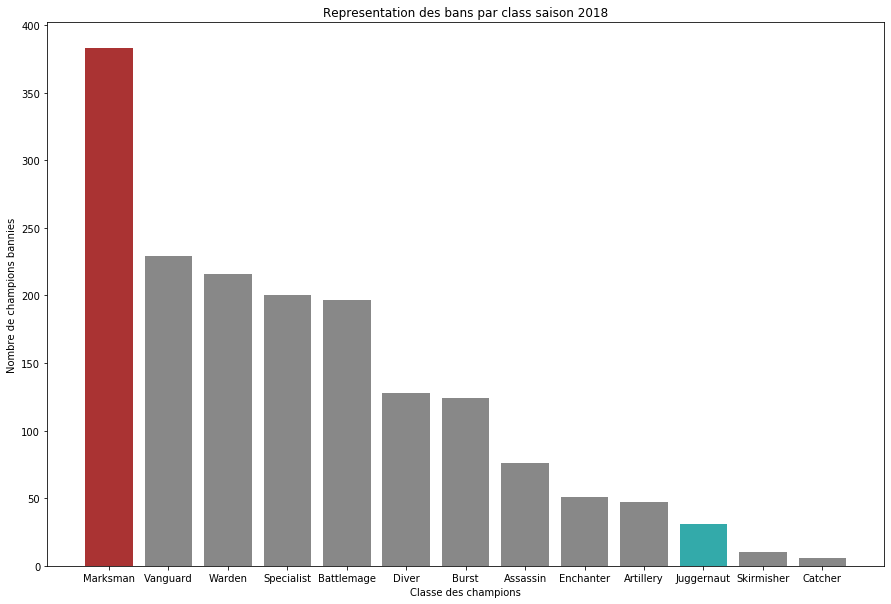

In [21]:
#Ban des type de champions en fonction des saisons.

#Pour chaque saison faire le nombre de ban par type de champions

#Ajout type de champions au bans, trie par date, puis projeciton des resusltat.

df_champ_periode = df_champ.drop(df_champ[df_champ.ReleaseDate >= df_bans.Date.max()].index)

df_bans_classChamp = df_bans.merge(right=df_champ_periode, right_on="Champions", left_on="Champions", how='left') 
df_bans_classChamp = df_bans_classChamp.drop(columns=["SecondaryClass","ReleaseDate"])

annéeMin = df_bans_classChamp.Date.dt.year.min()
annéeMax = df_bans_classChamp.Date.dt.year.max()

i = annéeMin
    
while i <= annéeMax:
    if i > 2014:
        matchSaison = df_bans_classChamp[df_bans_classChamp.Date.dt.year == i-1]  
        tt = pd.pivot_table(matchSaison, index="PrimaryClass",values="ban_pos", aggfunc="count")
        tt = tt.reset_index()
        tt = tt.sort_values(by="ban_pos",ascending = False)
        best_last_saison = tt.head(1)
        worst_last_saison = tt.tail(1)
        
    else:
        matchSaison = df_bans_classChamp[df_bans_classChamp.Date.dt.year == 2014]  
        tt = pd.pivot_table(matchSaison, index="PrimaryClass",values="ban_pos", aggfunc="count")
        tt = tt.reset_index()
        tt = tt.sort_values(by="ban_pos",ascending = False)
        best_last_saison = tt.head(1)
        worst_last_saison = tt.tail(1)
        
        
    matchSaison = df_bans_classChamp[df_bans_classChamp.Date.dt.year == i]
    
    tt = pd.pivot_table(matchSaison, index="PrimaryClass",values="ban_pos", aggfunc="count")
    tt = tt.reset_index()
    tt = tt.sort_values(by="ban_pos",ascending = False)

    plt.figure(figsize=(15,10))
    plt.title("Representation des bans par class saison {}".format(i))
    plt.xlabel("Classe des champions")
    plt.ylabel("Nombre de champions bannies")
    
    ax = plt.bar(x=tt.PrimaryClass, height=tt.ban_pos, color="#888888")

    ax = plt.bar(x=best_last_saison.PrimaryClass, height=tt[tt.PrimaryClass.isin(best_last_saison.PrimaryClass)].ban_pos, color="#aa3333")
    ax = plt.bar(x=worst_last_saison.PrimaryClass, height=tt[tt.PrimaryClass.isin(worst_last_saison.PrimaryClass)].ban_pos, color="#33AAAA")
    
    plt.show()
    i+=1
    
    




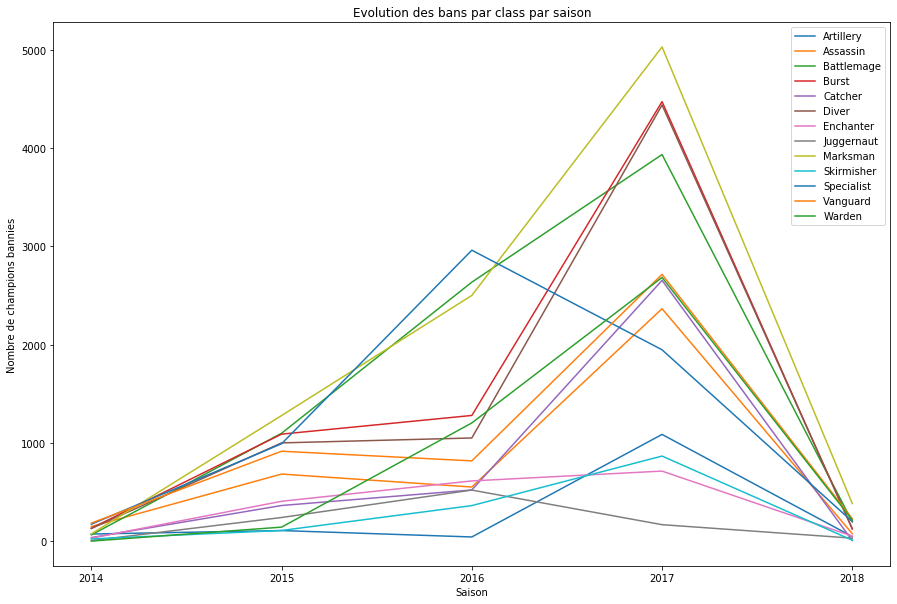

In [22]:
#Graph en plot sur le nombre de ban par saison

# Essayer de faire un tableau avec pour chaque saison le nombres de bans par class

a = pd.pivot_table(df_bans_classChamp, index="PrimaryClass", columns=df_bans_classChamp.Date.dt.year, values="Champions", aggfunc="count")
a = a.reset_index()

plt.figure(figsize=(15,10))
for i in a.PrimaryClass:
    y = a[a.PrimaryClass == i][[2014,2015,2016,2017,2018]].values[0]
    x = a.columns[1:].values
    plt.plot(x,y,label=i)

plt.title("Evolution des bans par class par saison")
plt.xlabel("Saison")
plt.ylabel("Nombre de champions bannies")
plt.xticks(np.arange(2014,2019,1))
plt.legend()
plt.show()


In [23]:
df_kills

,Address,Team,Time,Victim,Killer,Assist_1,Assist_2,Assist_3,Assist_4,x_pos,y_pos,Date
0,http://matchhistory.na.leagueoflegends.com/en/...,bKills,10.820,C9 Hai,TSM Bjergsen,NaN,NaN,NaN,NaN,9229,8469,2015-01-24
1,http://matchhistory.na.leagueoflegends.com/en/...,bKills,16.286,C9 LemonNation,TSM WildTurtle,TSM Santorin,TSM Bjergsen,TSM Lustboy,NaN,13908,5960,2015-01-24
2,http://matchhistory.na.leagueoflegends.com/en/...,bKills,18.733,C9 Hai,TSM Bjergsen,TSM Santorin,TSM WildTurtle,TSM Lustboy,NaN,8281,7889,2015-01-24
3,http://matchhistory.na.leagueoflegends.com/en/...,bKills,18.880,C9 Meteos,TSM Dyrus,TSM Santorin,TSM Bjergsen,TSM WildTurtle,TSM Lustboy,8522,8895,2015-01-24
4,http://matchhistory.na.leagueoflegends.com/en/...,bKills,27.005,C9 Balls,TSM Bjergsen,TSM Dyrus,TSM Santorin,TSM WildTurtle,TSM Lustboy,8902,7643,2015-01-24
...,...,...,...,...,...,...,...,...,...,...,...,...
191064,https://matchhistory.na.leagueoflegends.com/en...,rKills,35.086,TTC Papryze,LGC Claire,LGC Ceres,LGC Sybol,LGC Raid,LGC Decoy,6424,9256,2018-01-28
191065,https://matchhistory.na.leagueoflegends.com/en...,rKills,40.706,TTC Low,LGC Raid,LGC Ceres,LGC Sybol,LGC Decoy,NaN,1464,2974,2018-01-28
191066,https://matchhistory.na.leagueoflegends.com/en...,rKills,40.711,TTC Swathe,LGC Claire,LGC Ceres,LGC Sybol,LGC Raid,LGC Decoy,1014,4828,2018-01-28
191067,https://matchhistory.na.leagueoflegends.com/en...,rKills,41.113,TTC Tilting,LGC Claire,LGC Ceres,LGC Sybol,NaN,NaN,693,2924,2018-01-28


In [24]:
df_kills[["Address","Team","Killer"]]

,Address,Team,Killer
0,http://matchhistory.na.leagueoflegends.com/en/...,bKills,TSM Bjergsen
1,http://matchhistory.na.leagueoflegends.com/en/...,bKills,TSM WildTurtle
2,http://matchhistory.na.leagueoflegends.com/en/...,bKills,TSM Bjergsen
3,http://matchhistory.na.leagueoflegends.com/en/...,bKills,TSM Dyrus
4,http://matchhistory.na.leagueoflegends.com/en/...,bKills,TSM Bjergsen
...,...,...,...
191064,https://matchhistory.na.leagueoflegends.com/en...,rKills,LGC Claire
191065,https://matchhistory.na.leagueoflegends.com/en...,rKills,LGC Raid
191066,https://matchhistory.na.leagueoflegends.com/en...,rKills,LGC Claire
191067,https://matchhistory.na.leagueoflegends.com/en...,rKills,LGC Claire


In [25]:
df_champ_periode

,Champions,PrimaryClass,SecondaryClass,ReleaseDate
0,aatrox,Juggernaut,NaN,2013-06-13
1,ahri,Burst,NaN,2011-12-14
2,akali,Assassin,NaN,2010-05-11
3,alistar,Vanguard,NaN,2009-02-21
4,amumu,Vanguard,NaN,2009-06-26
...,...,...,...,...
143,zed,Assassin,NaN,2012-11-13
144,ziggs,Artillery,NaN,2012-02-01
145,zilean,Specialist,NaN,2009-04-18
146,zoe,Burst,NaN,2017-11-21


In [26]:
df_match.columns

Index(['League', 'Year', 'Season', 'Type', 'blueTeamTag', 'bResult', 'rResult',
       'redTeamTag', 'gamelength', 'blueTop', 'blueTopChamp', 'blueJungle',
       'blueJungleChamp', 'blueMiddle', 'blueMiddleChamp', 'blueADC',
       'blueADCChamp', 'blueSupport', 'blueSupportChamp', 'redTop',
       'redTopChamp', 'redJungle', 'redJungleChamp', 'redMiddle',
       'redMiddleChamp', 'redADC', 'redADCChamp', 'redSupport',
       'redSupportChamp', 'Address'],
      dtype='object')

In [27]:
#Faire un df kill par qui ?
compt=0
temp = pd.DataFrame({
    "Address":[],
    "Killer":[],
    "Champions":[]})
df_copy_kills = df_kills.copy()
df_copy_kills = df_copy_kills.drop(df_copy_kills[df_copy_kills.Killer.isna()].index)
df_copy_kills = df_copy_kills.drop(df_copy_kills[df_copy_kills.Killer=="None"].index)

for index, row in df_copy_kills.iterrows():

    df_copy_match = df_match.copy()
    df_copy_match = df_copy_match.drop(df_copy_match[df_copy_match.blueTop.isna()].index)
    match_actuelle = df_copy_match[df_copy_match.Address == row["Address"]]
    listChamp = []
    if row["Team"] == "bKills":
        if match_actuelle['blueTop'].values[0] in row["Killer"]:
            champKiller = match_actuelle['blueTopChamp'].values
        if match_actuelle['blueJungle'].values[0] in row["Killer"]:
            champKiller = match_actuelle['blueJungleChamp'].values
        if match_actuelle['blueMiddle'].values[0] in row["Killer"]:
            champKiller = match_actuelle['blueMiddleChamp'].values
        if match_actuelle['blueADC'].values[0] in row["Killer"]:
            champKiller = match_actuelle['blueADCChamp'].values
        if match_actuelle['blueSupport'].values[0] in row["Killer"]:
            champKiller = match_actuelle['blueSupportChamp'].values
    else:
        if match_actuelle['redTop'].values[0] in row["Killer"]:
            champKiller = match_actuelle['redTopChamp'].values
        if match_actuelle['redJungle'].values[0] in row["Killer"]:
            champKiller = match_actuelle['redJungleChamp'].values
        if match_actuelle['redMiddle'].values[0] in row["Killer"]:
            champKiller = match_actuelle['redMiddleChamp'].values
        if match_actuelle['redADC'].values[0] in row["Killer"]:
            champKiller = match_actuelle['redADCChamp'].values
        if match_actuelle['redSupport'].values[0] in row["Killer"]:
            champKiller = match_actuelle['redSupportChamp'].values
            
    listChamp = pd.DataFrame({"Address":[match_actuelle.Address.values[0]],"Killer":[row["Killer"]],"Champions":[champKiller[0]]})

    temp = temp.append(listChamp)
    compt+=1


In [28]:
#temp = temp.drop_duplicates()

In [29]:
temp

,Address,Killer,Champions
0,http://matchhistory.na.leagueoflegends.com/en/...,TSM Bjergsen,Ahri
0,http://matchhistory.na.leagueoflegends.com/en/...,TSM WildTurtle,Jinx
0,http://matchhistory.na.leagueoflegends.com/en/...,TSM Bjergsen,Ahri
0,http://matchhistory.na.leagueoflegends.com/en/...,TSM Dyrus,Irelia
0,http://matchhistory.na.leagueoflegends.com/en/...,TSM Bjergsen,Ahri
...,...,...,...
0,https://matchhistory.na.leagueoflegends.com/en...,LGC Claire,Malzahar
0,https://matchhistory.na.leagueoflegends.com/en...,LGC Raid,Vayne
0,https://matchhistory.na.leagueoflegends.com/en...,LGC Claire,Malzahar
0,https://matchhistory.na.leagueoflegends.com/en...,LGC Claire,Malzahar


In [30]:
temp[temp.Address == temp.iloc[5432].Address].Address.values[1]

'http://matchhistory.na.leagueoflegends.com/en/#match-details/TRLH1/1001760117?gameHash=7b11b422397350c0'

In [31]:
df_kills = df_kills.merge(right=temp, right_on=["Address","Killer"],left_on=["Address","Killer"],how="left")
#df_kills = df_kills.drop(columns=["Killer_y"])



In [32]:
df_kills.head()

,Address,Team,Time,Victim,Killer,Assist_1,Assist_2,Assist_3,Assist_4,x_pos,y_pos,Date,Champions
0,http://matchhistory.na.leagueoflegends.com/en/...,bKills,10.82,C9 Hai,TSM Bjergsen,NaN,NaN,NaN,NaN,9229,8469,2015-01-24,Ahri
1,http://matchhistory.na.leagueoflegends.com/en/...,bKills,10.82,C9 Hai,TSM Bjergsen,NaN,NaN,NaN,NaN,9229,8469,2015-01-24,Ahri
2,http://matchhistory.na.leagueoflegends.com/en/...,bKills,10.82,C9 Hai,TSM Bjergsen,NaN,NaN,NaN,NaN,9229,8469,2015-01-24,Ahri
3,http://matchhistory.na.leagueoflegends.com/en/...,bKills,10.82,C9 Hai,TSM Bjergsen,NaN,NaN,NaN,NaN,9229,8469,2015-01-24,Ahri
4,http://matchhistory.na.leagueoflegends.com/en/...,bKills,10.82,C9 Hai,TSM Bjergsen,NaN,NaN,NaN,NaN,9229,8469,2015-01-24,Ahri


In [33]:
#df_kills.columns = ["Address","Team","Time","Victim","Killer","Assist_1","Assist_2","Assist_3","Assist_4","x_pos","y_pos","Date","ChampionsKiller"]
#df_kills.ChampionsKiller = df_kills.ChampionsKiller.str.lower()

In [34]:
df_kills

,Address,Team,Time,Victim,Killer,Assist_1,Assist_2,Assist_3,Assist_4,x_pos,y_pos,Date,Champions
0,http://matchhistory.na.leagueoflegends.com/en/...,bKills,10.820,C9 Hai,TSM Bjergsen,NaN,NaN,NaN,NaN,9229,8469,2015-01-24,Ahri
1,http://matchhistory.na.leagueoflegends.com/en/...,bKills,10.820,C9 Hai,TSM Bjergsen,NaN,NaN,NaN,NaN,9229,8469,2015-01-24,Ahri
2,http://matchhistory.na.leagueoflegends.com/en/...,bKills,10.820,C9 Hai,TSM Bjergsen,NaN,NaN,NaN,NaN,9229,8469,2015-01-24,Ahri
3,http://matchhistory.na.leagueoflegends.com/en/...,bKills,10.820,C9 Hai,TSM Bjergsen,NaN,NaN,NaN,NaN,9229,8469,2015-01-24,Ahri
4,http://matchhistory.na.leagueoflegends.com/en/...,bKills,10.820,C9 Hai,TSM Bjergsen,NaN,NaN,NaN,NaN,9229,8469,2015-01-24,Ahri
...,...,...,...,...,...,...,...,...,...,...,...,...,...
951372,https://matchhistory.na.leagueoflegends.com/en...,rKills,41.201,TTC Papryze,LGC Claire,LGC Ceres,LGC Sybol,NaN,NaN,679,2602,2018-01-28,Malzahar
951373,https://matchhistory.na.leagueoflegends.com/en...,rKills,41.201,TTC Papryze,LGC Claire,LGC Ceres,LGC Sybol,NaN,NaN,679,2602,2018-01-28,Malzahar
951374,https://matchhistory.na.leagueoflegends.com/en...,rKills,41.201,TTC Papryze,LGC Claire,LGC Ceres,LGC Sybol,NaN,NaN,679,2602,2018-01-28,Malzahar
951375,https://matchhistory.na.leagueoflegends.com/en...,rKills,41.201,TTC Papryze,LGC Claire,LGC Ceres,LGC Sybol,NaN,NaN,679,2602,2018-01-28,Malzahar


In [35]:
#df_kills = df_kills.drop(columns=["Champions_x"])

In [36]:
#df_kills

In [37]:
df_kills.columns = ["Address","Team","Time","Victim","Killer","Assist_1","Assist_2","Assist_3","Assist_4","x_pos","y_pos","Date","ChampionsKiller"]

In [38]:
df_kills

,Address,Team,Time,Victim,Killer,Assist_1,Assist_2,Assist_3,Assist_4,x_pos,y_pos,Date,ChampionsKiller
0,http://matchhistory.na.leagueoflegends.com/en/...,bKills,10.820,C9 Hai,TSM Bjergsen,NaN,NaN,NaN,NaN,9229,8469,2015-01-24,Ahri
1,http://matchhistory.na.leagueoflegends.com/en/...,bKills,10.820,C9 Hai,TSM Bjergsen,NaN,NaN,NaN,NaN,9229,8469,2015-01-24,Ahri
2,http://matchhistory.na.leagueoflegends.com/en/...,bKills,10.820,C9 Hai,TSM Bjergsen,NaN,NaN,NaN,NaN,9229,8469,2015-01-24,Ahri
3,http://matchhistory.na.leagueoflegends.com/en/...,bKills,10.820,C9 Hai,TSM Bjergsen,NaN,NaN,NaN,NaN,9229,8469,2015-01-24,Ahri
4,http://matchhistory.na.leagueoflegends.com/en/...,bKills,10.820,C9 Hai,TSM Bjergsen,NaN,NaN,NaN,NaN,9229,8469,2015-01-24,Ahri
...,...,...,...,...,...,...,...,...,...,...,...,...,...
951372,https://matchhistory.na.leagueoflegends.com/en...,rKills,41.201,TTC Papryze,LGC Claire,LGC Ceres,LGC Sybol,NaN,NaN,679,2602,2018-01-28,Malzahar
951373,https://matchhistory.na.leagueoflegends.com/en...,rKills,41.201,TTC Papryze,LGC Claire,LGC Ceres,LGC Sybol,NaN,NaN,679,2602,2018-01-28,Malzahar
951374,https://matchhistory.na.leagueoflegends.com/en...,rKills,41.201,TTC Papryze,LGC Claire,LGC Ceres,LGC Sybol,NaN,NaN,679,2602,2018-01-28,Malzahar
951375,https://matchhistory.na.leagueoflegends.com/en...,rKills,41.201,TTC Papryze,LGC Claire,LGC Ceres,LGC Sybol,NaN,NaN,679,2602,2018-01-28,Malzahar


In [39]:
#doit etre 16
len(df_kills[df_kills.Address == temp[temp.Address == temp.iloc[5432].Address].Address.values[1]].drop_duplicates())

16

In [40]:
df_kills = df_kills.drop_duplicates()

In [41]:
df_kills[df_kills.Address == temp[temp.Address == temp.iloc[5432].Address].Address.values[1]]

,Address,Team,Time,Victim,Killer,Assist_1,Assist_2,Assist_3,Assist_4,x_pos,y_pos,Date,ChampionsKiller
27052,http://matchhistory.na.leagueoflegends.com/en/...,bKills,5.828,P1 Pirean,CLG Huhi,CLG Xmithie,CLG aphromoo,NaN,NaN,8604,7678,2016-06-26,Karma
27053,http://matchhistory.na.leagueoflegends.com/en/...,bKills,8.132,P1 Pirean,CLG Xmithie,CLG Huhi,NaN,NaN,NaN,8152,8753,2016-06-26,Elise
27055,http://matchhistory.na.leagueoflegends.com/en/...,bKills,15.777,P1 zig,CLG Darshan,CLG Xmithie,NaN,NaN,NaN,785,9633,2016-06-26,Fiora
27058,http://matchhistory.na.leagueoflegends.com/en/...,bKills,16.770,P1 Inori,CLG Stixxay,CLG Darshan,CLG Huhi,CLG aphromoo,NaN,5685,10991,2016-06-26,Lucian
27060,http://matchhistory.na.leagueoflegends.com/en/...,bKills,16.800,P1 Gate,CLG Stixxay,CLG Darshan,CLG Huhi,CLG aphromoo,NaN,6815,11410,2016-06-26,Lucian
27062,http://matchhistory.na.leagueoflegends.com/en/...,bKills,28.305,P1 Mash,CLG Xmithie,CLG aphromoo,NaN,NaN,NaN,7338,848,2016-06-26,Elise
27064,http://matchhistory.na.leagueoflegends.com/en/...,bKills,32.998,P1 zig,CLG Darshan,NaN,NaN,NaN,NaN,13291,8847,2016-06-26,Fiora
27067,http://matchhistory.na.leagueoflegends.com/en/...,bKills,37.193,P1 zig,CLG Darshan,CLG Huhi,CLG Stixxay,NaN,NaN,13051,13599,2016-06-26,Fiora
517430,http://matchhistory.na.leagueoflegends.com/en/...,rKills,5.995,CLG Xmithie,P1 Mash,P1 Inori,P1 Pirean,P1 Gate,NaN,7331,6892,2016-06-26,Tristana
517433,http://matchhistory.na.leagueoflegends.com/en/...,rKills,6.096,CLG aphromoo,P1 Gate,P1 zig,P1 Inori,P1 Mash,NaN,7432,5003,2016-06-26,Braum


In [42]:
len(df_kills[df_kills.Address == temp[temp.Address == temp.iloc[5432].Address].Address.values[1]])

16

In [43]:

df_kills.ChampionsKiller = df_kills.ChampionsKiller.str.lower()


/home/kozame/.local/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [44]:
df_kills

,Address,Team,Time,Victim,Killer,Assist_1,Assist_2,Assist_3,Assist_4,x_pos,y_pos,Date,ChampionsKiller
0,http://matchhistory.na.leagueoflegends.com/en/...,bKills,10.820,C9 Hai,TSM Bjergsen,NaN,NaN,NaN,NaN,9229,8469,2015-01-24,ahri
8,http://matchhistory.na.leagueoflegends.com/en/...,bKills,16.286,C9 LemonNation,TSM WildTurtle,TSM Santorin,TSM Bjergsen,TSM Lustboy,NaN,13908,5960,2015-01-24,jinx
13,http://matchhistory.na.leagueoflegends.com/en/...,bKills,18.733,C9 Hai,TSM Bjergsen,TSM Santorin,TSM WildTurtle,TSM Lustboy,NaN,8281,7889,2015-01-24,ahri
21,http://matchhistory.na.leagueoflegends.com/en/...,bKills,18.880,C9 Meteos,TSM Dyrus,TSM Santorin,TSM Bjergsen,TSM WildTurtle,TSM Lustboy,8522,8895,2015-01-24,irelia
23,http://matchhistory.na.leagueoflegends.com/en/...,bKills,27.005,C9 Balls,TSM Bjergsen,TSM Dyrus,TSM Santorin,TSM WildTurtle,TSM Lustboy,8902,7643,2015-01-24,ahri
...,...,...,...,...,...,...,...,...,...,...,...,...,...
951336,https://matchhistory.na.leagueoflegends.com/en...,rKills,35.086,TTC Papryze,LGC Claire,LGC Ceres,LGC Sybol,LGC Raid,LGC Decoy,6424,9256,2018-01-28,malzahar
951344,https://matchhistory.na.leagueoflegends.com/en...,rKills,40.706,TTC Low,LGC Raid,LGC Ceres,LGC Sybol,LGC Decoy,NaN,1464,2974,2018-01-28,vayne
951353,https://matchhistory.na.leagueoflegends.com/en...,rKills,40.711,TTC Swathe,LGC Claire,LGC Ceres,LGC Sybol,LGC Raid,LGC Decoy,1014,4828,2018-01-28,malzahar
951361,https://matchhistory.na.leagueoflegends.com/en...,rKills,41.113,TTC Tilting,LGC Claire,LGC Ceres,LGC Sybol,NaN,NaN,693,2924,2018-01-28,malzahar


In [45]:
df_champ_periode

,Champions,PrimaryClass,SecondaryClass,ReleaseDate
0,aatrox,Juggernaut,NaN,2013-06-13
1,ahri,Burst,NaN,2011-12-14
2,akali,Assassin,NaN,2010-05-11
3,alistar,Vanguard,NaN,2009-02-21
4,amumu,Vanguard,NaN,2009-06-26
...,...,...,...,...
143,zed,Assassin,NaN,2012-11-13
144,ziggs,Artillery,NaN,2012-02-01
145,zilean,Specialist,NaN,2009-04-18
146,zoe,Burst,NaN,2017-11-21


In [46]:
df_kills_champClass = df_kills.merge(right=df_champ_periode, right_on="Champions",left_on="ChampionsKiller",how="left")
df_kills_champClass = df_kills_champClass.drop(columns = ["Champions", "ReleaseDate"])

In [47]:
#doit etre 16
len(df_kills_champClass[df_kills_champClass.Address == temp[temp.Address == temp.iloc[5432].Address].Address.values[1]])

16

In [48]:

df_kills_champClass[df_kills_champClass.Address == temp[temp.Address == temp.iloc[5432].Address].Address.values[1]]


,Address,Team,Time,Victim,Killer,Assist_1,Assist_2,Assist_3,Assist_4,x_pos,y_pos,Date,ChampionsKiller,PrimaryClass,SecondaryClass
5432,http://matchhistory.na.leagueoflegends.com/en/...,bKills,5.828,P1 Pirean,CLG Huhi,CLG Xmithie,CLG aphromoo,NaN,NaN,8604,7678,2016-06-26,karma,Burst,NaN
5433,http://matchhistory.na.leagueoflegends.com/en/...,bKills,8.132,P1 Pirean,CLG Xmithie,CLG Huhi,NaN,NaN,NaN,8152,8753,2016-06-26,elise,Diver,NaN
5434,http://matchhistory.na.leagueoflegends.com/en/...,bKills,15.777,P1 zig,CLG Darshan,CLG Xmithie,NaN,NaN,NaN,785,9633,2016-06-26,fiora,Skirmisher,NaN
5435,http://matchhistory.na.leagueoflegends.com/en/...,bKills,16.770,P1 Inori,CLG Stixxay,CLG Darshan,CLG Huhi,CLG aphromoo,NaN,5685,10991,2016-06-26,lucian,Marksman,NaN
5436,http://matchhistory.na.leagueoflegends.com/en/...,bKills,16.800,P1 Gate,CLG Stixxay,CLG Darshan,CLG Huhi,CLG aphromoo,NaN,6815,11410,2016-06-26,lucian,Marksman,NaN
5437,http://matchhistory.na.leagueoflegends.com/en/...,bKills,28.305,P1 Mash,CLG Xmithie,CLG aphromoo,NaN,NaN,NaN,7338,848,2016-06-26,elise,Diver,NaN
5438,http://matchhistory.na.leagueoflegends.com/en/...,bKills,32.998,P1 zig,CLG Darshan,NaN,NaN,NaN,NaN,13291,8847,2016-06-26,fiora,Skirmisher,NaN
5439,http://matchhistory.na.leagueoflegends.com/en/...,bKills,37.193,P1 zig,CLG Darshan,CLG Huhi,CLG Stixxay,NaN,NaN,13051,13599,2016-06-26,fiora,Skirmisher,NaN
103489,http://matchhistory.na.leagueoflegends.com/en/...,rKills,5.995,CLG Xmithie,P1 Mash,P1 Inori,P1 Pirean,P1 Gate,NaN,7331,6892,2016-06-26,tristana,Marksman,NaN
103490,http://matchhistory.na.leagueoflegends.com/en/...,rKills,6.096,CLG aphromoo,P1 Gate,P1 zig,P1 Inori,P1 Mash,NaN,7432,5003,2016-06-26,braum,Warden,NaN


In [49]:
#doit etre 16
len(df_kills_champClass[df_kills_champClass.Address == temp[temp.Address == temp.iloc[5432].Address].Address.values[1]])

16

In [50]:
df_kills_champClass.columns

Index(['Address', 'Team', 'Time', 'Victim', 'Killer', 'Assist_1', 'Assist_2',
       'Assist_3', 'Assist_4', 'x_pos', 'y_pos', 'Date', 'ChampionsKiller',
       'PrimaryClass', 'SecondaryClass'],
      dtype='object')

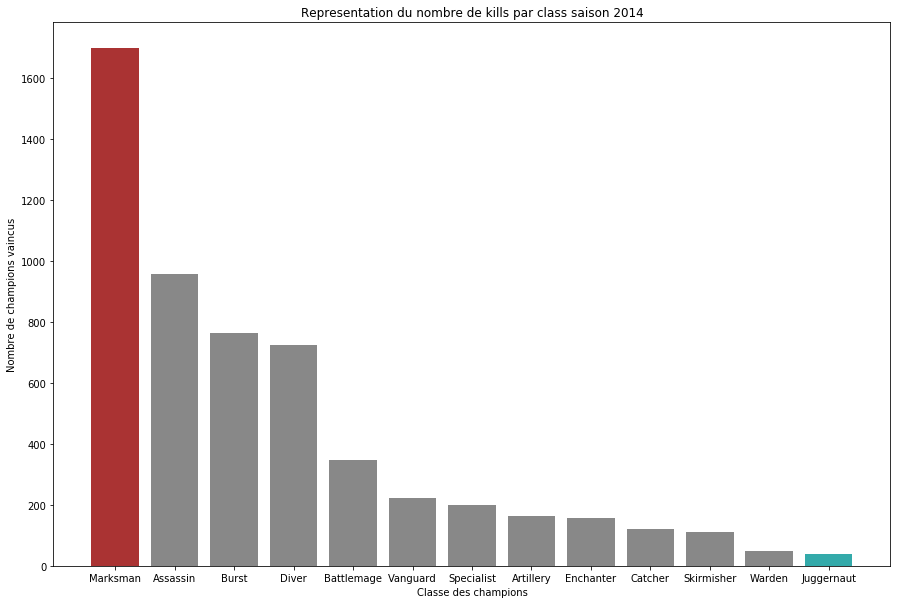

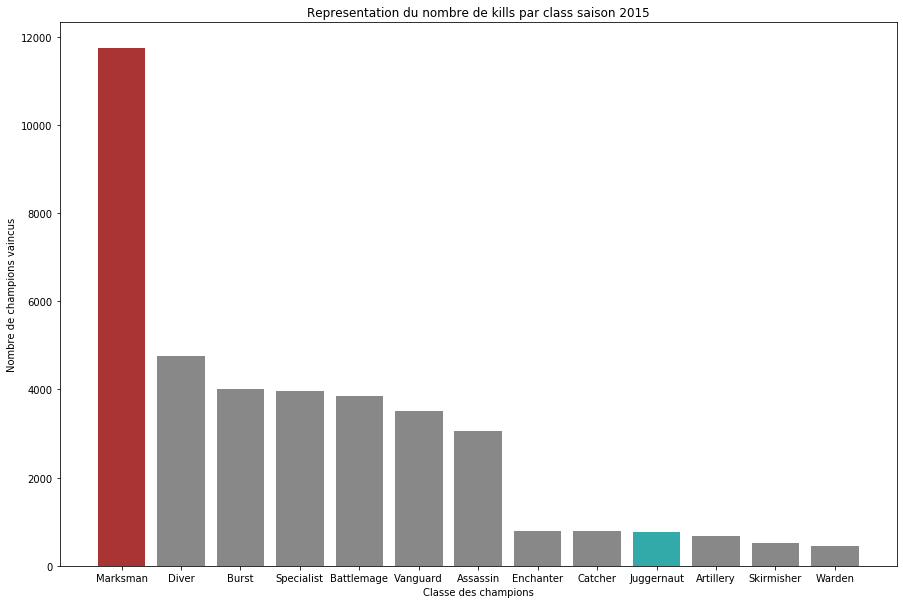

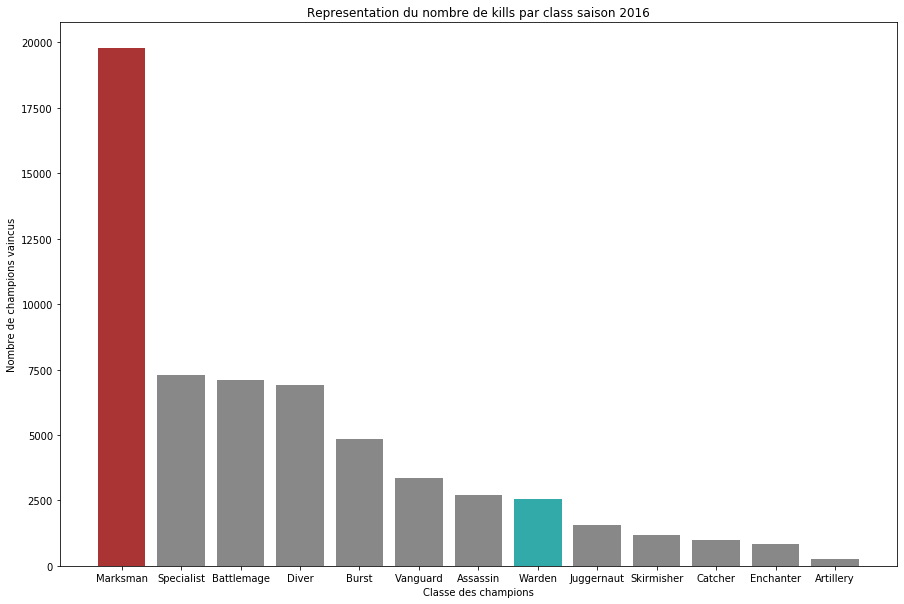

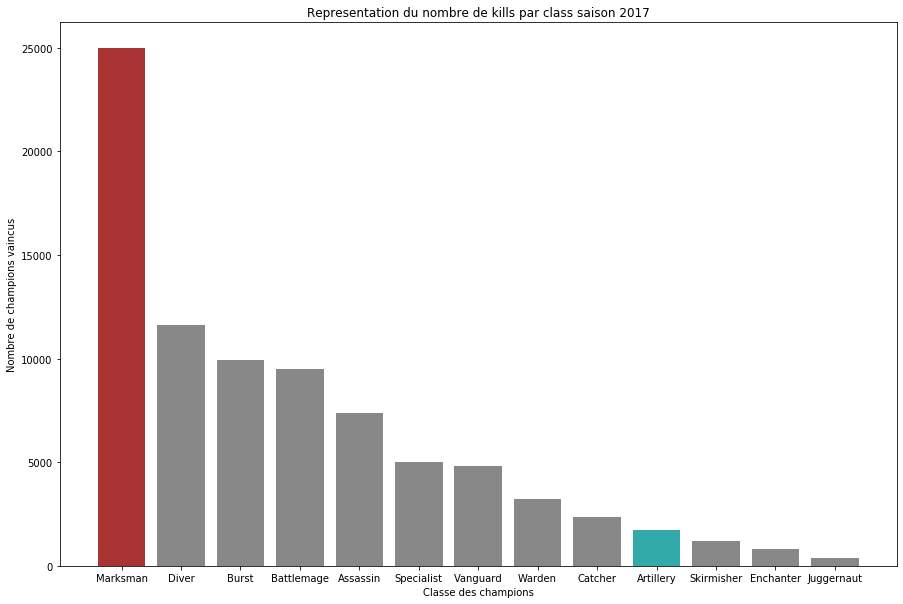

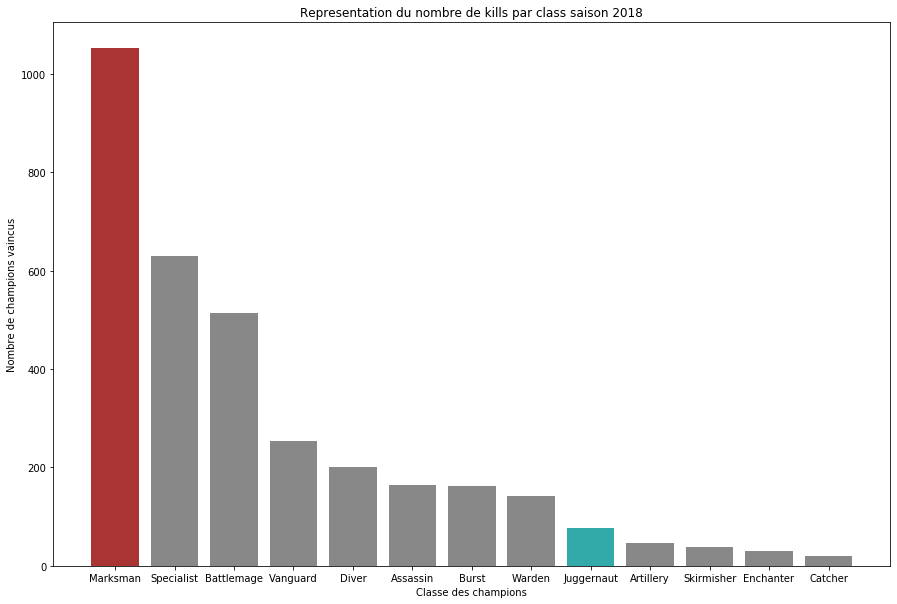

In [51]:
#Kills par type de champions en fonction des saisons.

#Pour chaque saison faire le nombre de kills par type de champions


df_kills_periode = df_kills_champClass.copy()

annéeMin = df_kills_periode.Date.dt.year.min()
annéeMax = df_kills_periode.Date.dt.year.max()

i = annéeMin
    
while i <= annéeMax:
    if i > 2014:
        matchSaison = df_kills_periode[df_kills_periode.Date.dt.year == i-1]  
        tt = pd.pivot_table(matchSaison, index="PrimaryClass", values="Victim", aggfunc="count")
        tt = tt.reset_index()
        tt = tt.sort_values(by="Victim",ascending = False)
        best_last_saison = tt.head(1)
        worst_last_saison = tt.tail(1)
        
    else:
        matchSaison = df_kills_periode[df_kills_periode.Date.dt.year == 2014]  
        tt = pd.pivot_table(matchSaison, index="PrimaryClass",values="Victim", aggfunc="count")
        tt = tt.reset_index()
        tt = tt.sort_values(by="Victim",ascending = False)
        best_last_saison = tt.head(1)
        worst_last_saison = tt.tail(1)
        
        
    matchSaison = df_kills_periode[df_kills_periode.Date.dt.year == i]
    
    tt = pd.pivot_table(matchSaison, index="PrimaryClass",values="Victim", aggfunc="count")
    tt = tt.reset_index()
    tt = tt.sort_values(by="Victim",ascending = False)

    plt.figure(figsize=(15,10))
    plt.title("Representation du nombre de kills par class saison {}".format(i))
    plt.xlabel("Classe des champions")
    plt.ylabel("Nombre de champions vaincus")
    
    ax = plt.bar(x=tt.PrimaryClass, height=tt.Victim, color="#888888")

    ax = plt.bar(x=best_last_saison.PrimaryClass, height=tt[tt.PrimaryClass.isin(best_last_saison.PrimaryClass)].Victim, color="#aa3333")
    ax = plt.bar(x=worst_last_saison.PrimaryClass, height=tt[tt.PrimaryClass.isin(worst_last_saison.PrimaryClass)].Victim, color="#33AAAA")
    
    plt.show()
    i+=1
    
    




In [52]:
df_kills_periode

,Address,Team,Time,Victim,Killer,Assist_1,Assist_2,Assist_3,Assist_4,x_pos,y_pos,Date,ChampionsKiller,PrimaryClass,SecondaryClass
0,http://matchhistory.na.leagueoflegends.com/en/...,bKills,10.820,C9 Hai,TSM Bjergsen,NaN,NaN,NaN,NaN,9229,8469,2015-01-24,ahri,Burst,NaN
1,http://matchhistory.na.leagueoflegends.com/en/...,bKills,16.286,C9 LemonNation,TSM WildTurtle,TSM Santorin,TSM Bjergsen,TSM Lustboy,NaN,13908,5960,2015-01-24,jinx,Marksman,NaN
2,http://matchhistory.na.leagueoflegends.com/en/...,bKills,18.733,C9 Hai,TSM Bjergsen,TSM Santorin,TSM WildTurtle,TSM Lustboy,NaN,8281,7889,2015-01-24,ahri,Burst,NaN
3,http://matchhistory.na.leagueoflegends.com/en/...,bKills,18.880,C9 Meteos,TSM Dyrus,TSM Santorin,TSM Bjergsen,TSM WildTurtle,TSM Lustboy,8522,8895,2015-01-24,irelia,Diver,NaN
4,http://matchhistory.na.leagueoflegends.com/en/...,bKills,27.005,C9 Balls,TSM Bjergsen,TSM Dyrus,TSM Santorin,TSM WildTurtle,TSM Lustboy,8902,7643,2015-01-24,ahri,Burst,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191061,https://matchhistory.na.leagueoflegends.com/en...,rKills,35.086,TTC Papryze,LGC Claire,LGC Ceres,LGC Sybol,LGC Raid,LGC Decoy,6424,9256,2018-01-28,malzahar,Battlemage,NaN
191062,https://matchhistory.na.leagueoflegends.com/en...,rKills,40.706,TTC Low,LGC Raid,LGC Ceres,LGC Sybol,LGC Decoy,NaN,1464,2974,2018-01-28,vayne,Marksman,NaN
191063,https://matchhistory.na.leagueoflegends.com/en...,rKills,40.711,TTC Swathe,LGC Claire,LGC Ceres,LGC Sybol,LGC Raid,LGC Decoy,1014,4828,2018-01-28,malzahar,Battlemage,NaN
191064,https://matchhistory.na.leagueoflegends.com/en...,rKills,41.113,TTC Tilting,LGC Claire,LGC Ceres,LGC Sybol,NaN,NaN,693,2924,2018-01-28,malzahar,Battlemage,NaN


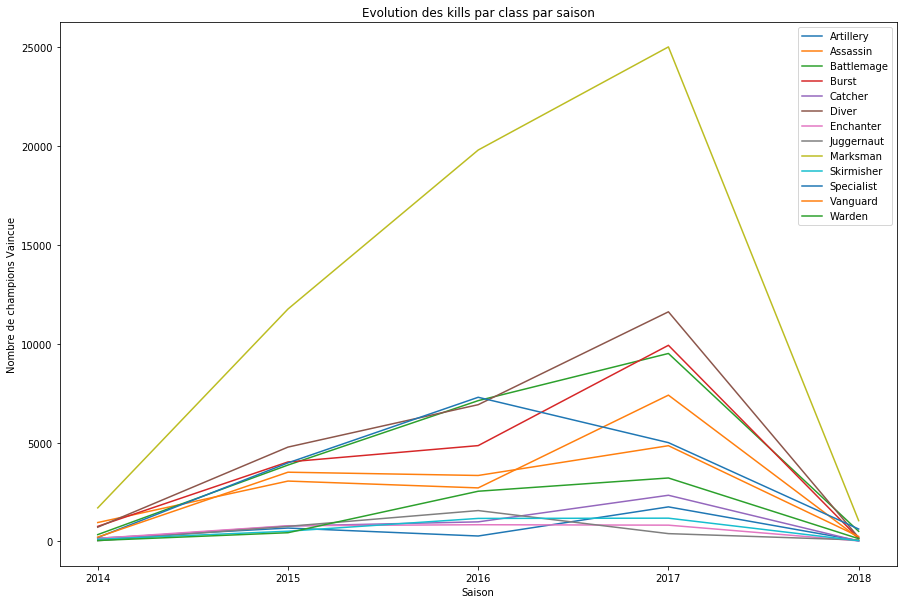

In [53]:
#Graph en plot sur le nombre de ban par saison

# Essayer de faire un tableau avec pour chaque saison le nombres de bans par class
df_kills_periode = df_kills_champClass.copy()

a = pd.pivot_table(df_kills_periode, index="PrimaryClass", columns=df_kills_periode.Date.dt.year, values="Victim", aggfunc="count")
a = a.reset_index()

plt.figure(figsize=(15,10))
for i in a.PrimaryClass:
    y = a[a.PrimaryClass == i][[2014,2015,2016,2017,2018]].values[0]
    x = a.columns[1:].values
    plt.plot(x,y,label=i)

plt.title("Evolution des kills par class par saison")
plt.xlabel("Saison")
plt.ylabel("Nombre de champions Vaincue")
plt.xticks(np.arange(2014,2019,1))
plt.legend()
plt.show()


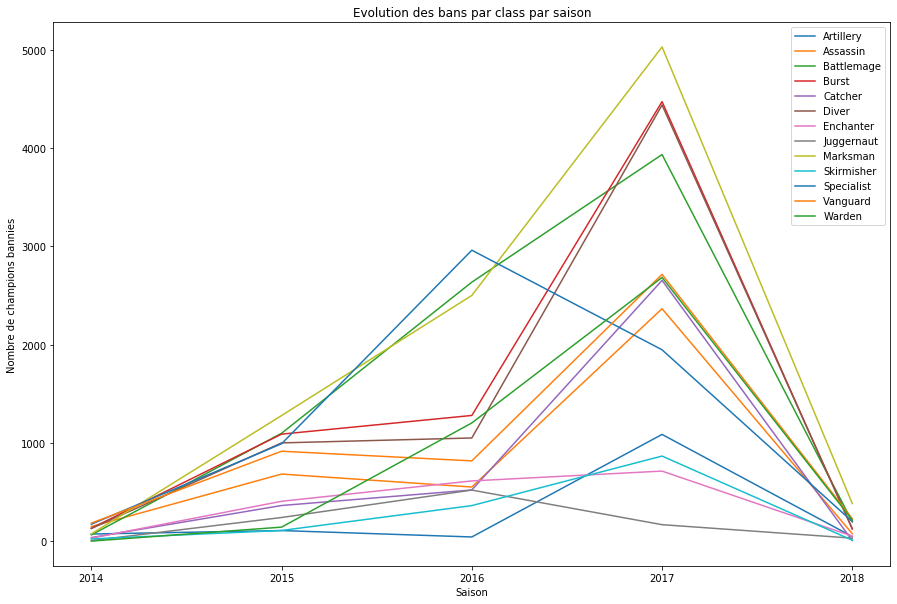

In [54]:
#Graph en plot sur le nombre de ban par saison

# Essayer de faire un tableau avec pour chaque saison le nombres de bans par class

a = pd.pivot_table(df_bans_classChamp, index="PrimaryClass", columns=df_bans_classChamp.Date.dt.year, values="Champions", aggfunc="count")
a = a.reset_index()

plt.figure(figsize=(15,10))
for i in a.PrimaryClass:
    y = a[a.PrimaryClass == i][[2014,2015,2016,2017,2018]].values[0]
    x = a.columns[1:].values
    plt.plot(x,y,label=i)

plt.title("Evolution des bans par class par saison")
plt.xlabel("Saison")
plt.ylabel("Nombre de champions bannies")
plt.xticks(np.arange(2014,2019,1))
plt.legend()
plt.show()


In [55]:
df_match

,League,Year,Season,Type,blueTeamTag,bResult,rResult,redTeamTag,gamelength,blueTop,...,redTopChamp,redJungle,redJungleChamp,redMiddle,redMiddleChamp,redADC,redADCChamp,redSupport,redSupportChamp,Address
0,NALCS,2015,Spring,Season,TSM,1,0,C9,40,Dyrus,...,Gnar,Meteos,Elise,Hai,Fizz,Sneaky,Sivir,LemonNation,Thresh,http://matchhistory.na.leagueoflegends.com/en/...
1,NALCS,2015,Spring,Season,CST,0,1,DIG,38,Cris,...,Irelia,Crumbzz,JarvanIV,Shiphtur,Azir,CoreJJ,Corki,KiWiKiD,Annie,http://matchhistory.na.leagueoflegends.com/en/...
2,NALCS,2015,Spring,Season,WFX,1,0,GV,40,Flaresz,...,Sion,Saintvicious,LeeSin,Keane,Azir,Cop,Corki,BunnyFuFuu,Janna,http://matchhistory.na.leagueoflegends.com/en/...
3,NALCS,2015,Spring,Season,TIP,0,1,TL,41,Rhux,...,Gnar,IWDominate,Nunu,Fenix,Lulu,KEITH,KogMaw,Xpecial,Janna,http://matchhistory.na.leagueoflegends.com/en/...
4,NALCS,2015,Spring,Season,CLG,1,0,T8,35,Benny,...,Sion,Porpoise8,RekSai,Slooshi8,Lulu,Maplestreet8,Corki,Dodo8,Annie,http://matchhistory.na.leagueoflegends.com/en/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7615,TCL,2018,Spring,Season,YC,0,1,SUP,34,Elwind,...,Chogath,Stomaged,XinZhao,GBM,Veigar,Zeitnot,Xayah,SnowFlower,Rakan,https://matchhistory.euw.leagueoflegends.com/e...
7616,TCL,2018,Spring,Season,GAL,0,1,DP,39,Rare,...,Chogath,KaKAO,Ivern,Lucete,Ryze,Ruvelius,Caitlyn,Japone,Braum,https://matchhistory.euw.leagueoflegends.com/e...
7617,OPL,2018,Spring,Season,SIN,0,1,DW,24,Praedyth,...,Gangplank,Praelus,Evelynn,Triple,Malzahar,k1ng,Ezreal,Cupcake,Taric,https://matchhistory.na.leagueoflegends.com/en...
7618,OPL,2018,Spring,Season,LGC,1,0,TTC,35,Ceres,...,Gangplank,Swathe,JarvanIV,Shok,Veigar,Low,Sivir,Tilting,Janna,https://matchhistory.na.leagueoflegends.com/en...


In [56]:
df_match.columns

Index(['League', 'Year', 'Season', 'Type', 'blueTeamTag', 'bResult', 'rResult',
       'redTeamTag', 'gamelength', 'blueTop', 'blueTopChamp', 'blueJungle',
       'blueJungleChamp', 'blueMiddle', 'blueMiddleChamp', 'blueADC',
       'blueADCChamp', 'blueSupport', 'blueSupportChamp', 'redTop',
       'redTopChamp', 'redJungle', 'redJungleChamp', 'redMiddle',
       'redMiddleChamp', 'redADC', 'redADCChamp', 'redSupport',
       'redSupportChamp', 'Address'],
      dtype='object')

#### -----------------------------Picks des personnage en fonciton des patch----------------------------------

In [57]:
df_test_tt_ii = pd.DataFrame({"Address":[],"Champion":[]})

for i,row in df_match.iterrows():
    
    address = row['Address']
    
    champtempo1 = row['blueJungleChamp']
    champtempo2 = row['blueMiddleChamp']
    champtempo3 = row['blueADCChamp']
    champtempo4 = row['blueSupportChamp']
    champtempo5 = row['redTopChamp']
    champtempo6 = row['redJungleChamp']
    champtempo7 = row['redMiddleChamp']
    champtempo8 = row['redADCChamp']
    champtempo9 = row['redSupportChamp']
    
    df_test_tt_ii = df_test_tt_ii.append({"Address":address,"Champion":champtempo1},ignore_index=True)
    df_test_tt_ii = df_test_tt_ii.append({"Address":address,"Champion":champtempo2},ignore_index=True)
    df_test_tt_ii = df_test_tt_ii.append({"Address":address,"Champion":champtempo3},ignore_index=True)
    df_test_tt_ii = df_test_tt_ii.append({"Address":address,"Champion":champtempo4},ignore_index=True)
    df_test_tt_ii = df_test_tt_ii.append({"Address":address,"Champion":champtempo5},ignore_index=True)
    df_test_tt_ii = df_test_tt_ii.append({"Address":address,"Champion":champtempo6},ignore_index=True)
    df_test_tt_ii = df_test_tt_ii.append({"Address":address,"Champion":champtempo7},ignore_index=True)
    df_test_tt_ii = df_test_tt_ii.append({"Address":address,"Champion":champtempo8},ignore_index=True)
    df_test_tt_ii = df_test_tt_ii.append({"Address":address,"Champion":champtempo9},ignore_index=True)
    


In [58]:
df_test_tt_ii = df_test_tt_ii.merge(df_date,how="right",left_on="Address",right_on="Address")

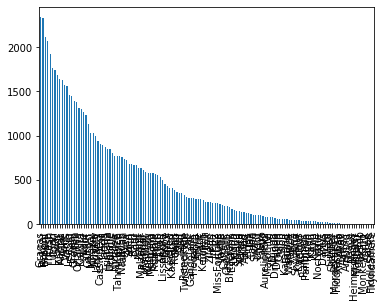

In [59]:
df_test_tt_ii.Champion.value_counts().plot(kind="bar")

In [60]:
df_test_tt_ii.Champion.value_counts().head(10)

Gragas     2339
RekSai     2326
Braum      2115
Elise      2065
Thresh     1923
Lucian     1759
Corki      1744
Sivir      1682
Karma      1644
Alistar    1624
Name: Champion, dtype: int64

In [62]:
df_chamIntro = pd.DataFrame()

for i in df_patchNotes.NvxPersonnage:
    if not isinstance(i, float):
        nbjour = 30
                
        indexNouveauChamp = df_patchNotes[df_patchNotes.NvxPersonnage == i].index[0]
        dateAjoutChamp = df_patchNotes.iloc[indexNouveauChamp].Date
        nomChampAjout = df_patchNotes.iloc[indexNouveauChamp].NvxPersonnage[1:-1]
        dateplusjour = date + dt.timedelta(days=nbjour)
        
        
        temp = df_test_tt_ii[(df_test_tt_ii.Date < dateplusjour) & (df_test_tt_ii.Date >= dateAjoutChamp)]
        nombre_de_match = len(temp.Address.unique())

        temp = pd.DataFrame(temp.Champion.value_counts())
        temp = temp.sort_values(by="Champion", ascending=False)
        temp = temp.reset_index()
        temp = temp.reset_index()
        temp.columns = ["Place","Champion","NombrePick"]
        temp.Place = temp.Place+1
        temp.Champion = temp.Champion.str.lower()
        
        pourcentage_pick = (temp[temp.Champion == nomChampAjout].NombrePick.values*100)/nombre_de_match     
        place_pick = temp[temp.Champion == nomChampAjout].Place.values
        
        df_chamIntro = df_chamIntro.append({"Champions":nomChampAjout, "Pourcentage pick":pourcentage_pick.round(2), "Place classement":place_pick}, ignore_index=True)
        
        print("Le champions {} est prit dans {} % des matchs 30 jours apres sont introduction  (place classement: {} )".format(nomChampAjout,pourcentage_pick.round(2), place_pick))        
        print("------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
        

Le champions azir est prit dans [11.16] % des matchs 30 jours apres sont introduction  (place classement: [29] )
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Le champions bard est prit dans [9.7] % des matchs 30 jours apres sont introduction  (place classement: [35] )
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Le champions ekko est prit dans [8.26] % des matchs 30 jours apres sont introduction  (place classement: [39] )
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Le champions tahmkench est prit dans [10.93] % des matchs 30 jours apres sont introduction  (place classement: [29] )
---

In [67]:
df_ReworkChamp = pd.DataFrame()

for i in df_patchNotes.ChangementMajeurPersonnage:
    if not isinstance(i, float):
        nbjour = 30
                
        indexNouveauChamp = df_patchNotes[df_patchNotes.ChangementMajeurPersonnage == i].index[0]
        dateAjoutChamp = df_patchNotes.iloc[indexNouveauChamp].Date
        nomChampAjout = df_patchNotes.iloc[indexNouveauChamp].ChangementMajeurPersonnage[1:-1]
        
        dateplusjour = date + dt.timedelta(days=nbjour)
        datemoinsjour = date - dt.timedelta(days=nbjour)
        
        #apres rework
        temp = df_test_tt_ii[(df_test_tt_ii.Date < dateplusjour) & (df_test_tt_ii.Date >= dateAjoutChamp)]
        nombre_de_match = len(temp.Address.unique())

        temp = pd.DataFrame(temp.Champion.value_counts())
        temp = temp.sort_values(by="Champion", ascending=False)
        temp = temp.reset_index()
        temp = temp.reset_index()
        temp.columns = ["Place","Champion","NombrePick"]
        temp.Place = temp.Place+1
        temp.Champion = temp.Champion.str.lower()
        
        #avant rework
        temp2 = df_test_tt_ii[(df_test_tt_ii.Date > datemoinsjour) & (df_test_tt_ii.Date <= dateAjoutChamp)]
        nombre_de_match2 = len(temp2.Address.unique())

        temp2 = pd.DataFrame(temp2.Champion.value_counts())
        temp2 = temp2.sort_values(by="Champion", ascending=False)
        temp2 = temp2.reset_index()
        temp2 = temp2.reset_index()
        temp2.columns = ["Place","Champion","NombrePick"]
        temp2.Place = temp2.Place+1
        temp2.Champion = temp2.Champion.str.lower()
        
        
        pourcentage_pick_apres = (temp[temp.Champion == nomChampAjout].NombrePick.values*100)/nombre_de_match
        pourcentage_pick_avant = (temp2[temp2.Champion == nomChampAjout].NombrePick.values*100)/nombre_de_match2     
        
        place_pick_apres = temp[temp.Champion == nomChampAjout].Place.values
        place_pick_avant = temp2[temp2.Champion == nomChampAjout].Place.values
        
        
        df_ReworkChamp = df_ReworkChamp.append({"Champions":nomChampAjout, "Pourcentage pick apres":pourcentage_pick_apres.round(2), "Place classement apres":place_pick_apres, "Pourcentage pick avant":pourcentage_pick_avant.round(2), "Place classement avant":place_pick_avant}, ignore_index=True)
        print("Le champions {} est prit dans {} % des matchs 30 jours apres sont rework (place classement: {} )".format(nomChampAjout,pourcentage_pick_apres.round(2), place_pick_apres)) 
        print(" il était prit a {} % avant cela (place avant : {}) ".format(pourcentage_pick_avant.round(2), place_pick_avant))
        print("------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
        

Le champions soraka est prit dans [1.99] % des matchs 30 jours apres sont rework (place classement: [84] )
 il était prit a [] % avant cela (place avant : []) 
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Le champions viktor est prit dans [16.77] % des matchs 30 jours apres sont rework (place classement: [20] )
 il était prit a [] % avant cela (place avant : []) 
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Le champions sion est prit dans [0.8] % des matchs 30 jours apres sont rework (place classement: [102] )
 il était prit a [] % avant cela (place avant : []) 
---------------------------------------------------------------------------------------------------------------------------------------------------------------

In [64]:
df_ReworkChamp

,Champions,Place classement apres,Place classement avant,Pourcentage pick apres,Pourcentage pick avant
0,soraka,[84],[],[1.99],[]
1,viktor,[20],[],[16.77],[]
2,sion,[102],[],[0.8],[]
3,zilean,[70],[],[3.21],[]
4,veigar,[113],[],[0.42],[]
5,mordekaiser,[122],[],[0.2],[]
6,taric,[55],[],[4.9],[]
7,kogmaw,[45],[],[7.12],[]
8,warrwick,[],[],[],[]
9,aatrox,[114],[],[0.17],[]


In [65]:
df_chamIntro

,Champions,Place classement,Pourcentage pick
0,azir,[29],[11.16]
1,bard,[35],[9.7]
2,ekko,[39],[8.26]
3,tahmkench,[29],[10.93]
4,kindred,[46],[7.16]
5,jhin,[7],[24.28]
6,aurelionsol,[85],[1.66]
7,taliyah,[20],[15.26]
8,kled,[67],[3.59]
9,ivern,[47],[6.23]
